In [760]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cebra
import cebra.datasets
from cebra import CEBRA


### 1. Load in Mthal data 
- CEBRA models 
- corrisponding embeddings (create from models and neural data)
- discerte_lables (what was used to train the model)
###### Neural Data
- neural_data (all nerual data (100%) full recording), 
- neural_train (neural data seperated into training group (80% of neural_data) that made corresponding cebra model)
- neural_test (neural data seperated into test group (20% of neural_data) that made corresponding cebra model)

In [761]:
mouse = 'reach1_4'

In [762]:
# variables to load different models and neural data
num_reaches = 278
probe = 'B' # probe used for the neural data
bin_size_in_ms = 50 # in milliseconds
output_dimension = 32 # number of dimensions for the embeddingspre
pre_reach = 1
post_reach = 10

load full neural_data

In [763]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'

# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'

# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
mthal_neural_data = neural_data_transposed
mthal_neural_data_original = neural_data

(538, 61160)
(61160, 538)


load neural data (train and test)

In [764]:
path_ = f'train_test_data/{mouse}_neural_train.npy'
neural_train = np.load(path_)

path_ = f'train_test_data/{mouse}_neural_test.npy'
neural_test = np.load(path_)

path_ = f'train_test_data/{mouse}_label_train.npy'
label_train = np.load(path_)

path_ = f'train_test_data/{mouse}_label_test.npy'
label_test = np.load(path_)

neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48928, 538), (12232, 538), (48928, 2), (12232, 2))

In [765]:
48928 + 12232

61160

load cebra models and make embeddings

In [766]:
MI = 5000 # maximum number of iterations
OD =32 # output dimension
P = 'B' # probe letter

In [767]:

# We get train set embedding and test set embedding.
cebra_posdir_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_posdir_train_mthal = cebra_posdir_model_mthal.transform(neural_train)
cebra_posdir_test_mthal = cebra_posdir_model_mthal.transform(neural_test)

cebra_pos_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_pos_train = cebra_pos_model_mthal.transform(neural_train)
cebra_pos_test = cebra_pos_model_mthal.transform(neural_test)

cebra_dir_model_mthal = cebra.CEBRA.load(f"cebra_models/reach1_4/01/B/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}.pt")
cebra_dir_train_mthal = cebra_dir_model_mthal.transform(neural_train)
cebra_dir_test_mthal = cebra_dir_model_mthal.transform(neural_test)

cebra_pos_all_mthal = cebra_pos_model_mthal.transform(neural_data_transposed)
cebra_dir_all_mthal = cebra_dir_model_mthal.transform(neural_data_transposed)
cebra_posdir_all_mthal = cebra_posdir_model_mthal.transform(neural_data_transposed)

load discerte_lables 

In [1342]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'

# this path is for nerual data in 10ms with time window 1-2, Shape should be (60000, 2)
# trial_ID is all = 0.0, plus normal SF labels
load_path = r"cebra_models\reach1_4\03\discete_labels_used_to_train_these_models\reach1_4_trial_ID_SF_1_2_10ms_SF_2024-05-10_18-05-37.npy"

discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
print(discete_lables.shape)
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1])

(60000, 2)


(array([0.]), array([0., 1.]))

preview embeddings

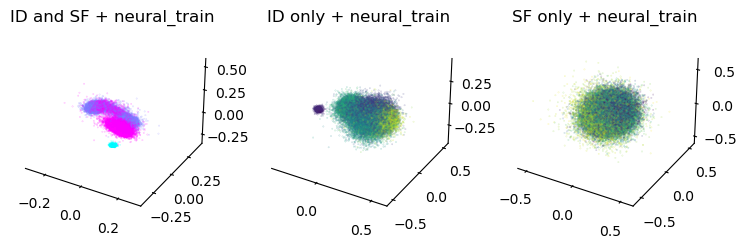

In [769]:

fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')


ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_mthal, embedding_labels=discete_lables[:,0], title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_mthal, embedding_labels='time', title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_mthal, embedding_labels='time', title='SF only + neural_train')


# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')

plt.show()


load cebra-time models (not trained with lables)

Text(0.5, 0.98, 'CEBRA-Time Model, Mthal')

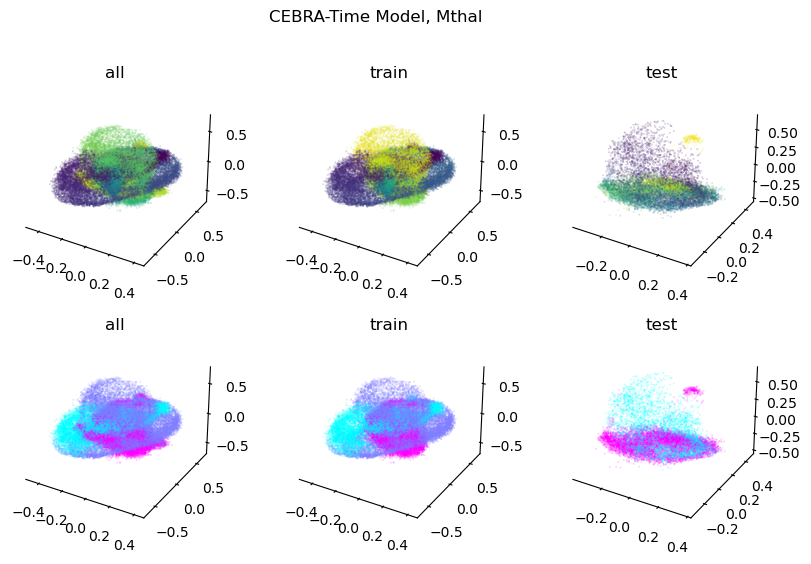

In [770]:
path_0 = "reach1_4_50msFr_0.001LR_1000MI_outDim32_B_2024-03-29_19-31-13_timeOnly.cebra"
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim32_B_2024-04-02_13-07-00_timeOnly.cebra'

cebra_time_model_mthal = cebra.CEBRA.load(f'time_only_models/{path_0}')
cebra_time_all_mthal = cebra_time_model_mthal.transform(neural_data_transposed)
cebra_time_train_mthal = cebra_time_model_mthal.transform(neural_train)
cebra_time_test_mthal = cebra_time_model_mthal.transform(neural_test)


plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_mthal, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_mthal, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_mthal, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, Mthal')

cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

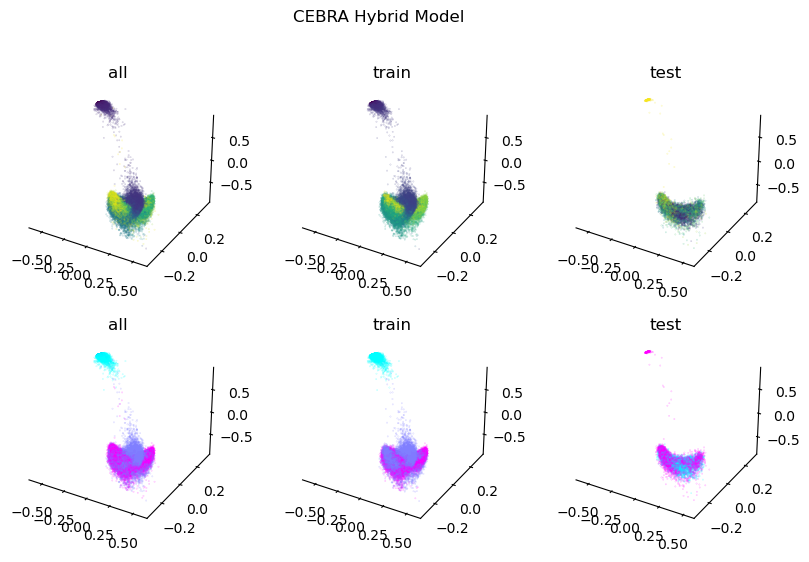

In [771]:

path = r"C:\Users\user\Documents\github\RNN_reaching_task\cebra_models\reach1_4\02\B\cebra_trialID_hybrid_model_1000_32_reach1_4_B_2024-05-06_19-55-50.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_mthal = cebra.CEBRA.load(path)

cebra_hybrid_all_mthal = cebra_pos_hybrid_model_mthal.transform(neural_data_transposed)
cebra_pos_hybrid_train_mthal = cebra_pos_hybrid_model_mthal.transform(neural_train)
cebra_pos_hybrid_test_mthal = cebra_pos_hybrid_model_mthal.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_mthal, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_mthal, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_mthal, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_hybrid_all_mthal, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_hybrid_train_mthal, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_pos_hybrid_test_mthal, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

In [773]:
mthal_embedding_train = cebra_pos_hybrid_train_mthal
mthal_embedding_all = cebra_hybrid_all_mthal
# mthal_embedding_all= cebra_time_all_mthal
# mthal_embedding_train = cebra_time_train_mthal


### 1.2 Load in M1 data 


In [1343]:
probe = 'A' # probe used for the neural data
P = probe

load full neural data

In [1344]:
# the path to the .npy file for the neural data (structred as firing rates x time x neurons)
# 50ms, 1-10 window
neural_data_path =f'neural_data/{mouse}_{bin_size_in_ms}ms_FR_{window_size}_{probe}.npy'
# 10ms, 1-2 window
neural_data_path = 'neural_data/reach1_4_10ms_FR_1_2_timeWindow_A.npy'

In [1345]:
pre_reach_str = str(pre_reach)
if pre_reach < 1:
    window_size = f'{pre_reach_str[0]}{pre_reach_str[-1]}_{post_reach}_timeWindow'
if pre_reach >= 1:
    window_size = f'{pre_reach_str}_{post_reach}_timeWindow'


# load the neural data
neural_data = cebra.load_data(neural_data_path)
print(neural_data.shape)
neural_data_transposed = neural_data.T  # This changes shape to (58380, 538)
print(neural_data_transposed.shape)
m1_neural_data = neural_data_transposed
m1_neural_data_orignal = neural_data

(45, 83400)
(83400, 45)


"sort out the good units (this m1_good_unit_indexs was created by eye from looking at raster plots for probe A)

In [1346]:
useGoodUnits_Only = True

# THe m1_good_unit_indexs I made by hand sorting the units by raster plots. these are all the good ones, without going throug Phy to merge and fix things again
m1_good_unit_indexs = [1, 7,  8,  9, 10, 12, 13, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 35, 41, 44,]
len(m1_good_unit_indexs)
if probe == 'A':
    if useGoodUnits_Only:
            # Select the rows corresponding to m1_good_unit_indexs
        neural_data_sorted = neural_data[m1_good_unit_indexs, :]

        print(neural_data_sorted.shape)

        # Here is an option to remove the last 278 reaches from these units. because about half of the units in m1_good_unit_indexs lose all their spikes from reach 200 onwards
        neural_data_sorted_chopped_reach_200 = neural_data_sorted[:,0:60000] 
        neural_data_transposed = neural_data_sorted_chopped_reach_200.T
        m1_neural_data = neural_data_transposed
        m1_neural_data_orignal = neural_data
m1_neural_data.shape

(21, 83400)


(60000, 21)

Split Loaded Neural_data into test and training sets

In [1347]:
discete_lables.shape

(60000, 2)

In [1348]:
def split_data(data, test_ratio):

    split_idx = int(len(data)* (1-test_ratio))
    neural_train = neural_data_transposed[:split_idx]
    neural_test = neural_data_transposed[split_idx:]
    label_train = discete_lables[:split_idx]
    label_test = discete_lables[split_idx:]

    return neural_train, neural_test, label_train, label_test

neural_train, neural_test, label_train, label_test = split_data(neural_data_transposed, 0.2)
neural_train.shape, neural_test.shape, label_train.shape, label_test.shape

((48000, 21), (12000, 21), (48000, 2), (12000, 2))

load cebra models and make embeddings

In [1349]:
MI = 2500 # maximum number of iterations
OD =3 # output dimension
P = 'A' # probe letter

In [1350]:
np.unique(label_train[:,0]), np.unique(label_train[:,1])

(array([0.]), array([0., 1.]))

In [1053]:
MI, OD, mouse, P
MI = 2500
neural_train.shape

(35200, 21)

In [1054]:
# We get train set embedding and test set embedding.
trialID_SF_model_path =
cebra_posdir_model_m1 =  cebra.CEBRA.load(trialID_SF_model_path)
cebra_posdir_train_m1 = cebra_posdir_model_m1.transform(neural_train)
cebra_posdir_test_m1 = cebra_posdir_model_m1.transform(neural_test)

trialID_model_path =
cebra_pos_model_m1 = cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_trialID_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_pos_train_m1 = cebra_pos_model_m1.transform(neural_train)
cebra_pos_test_m1 = cebra_pos_model_m1.transform(neural_test)

SF_model_path =
cebra_dir_model_m1  =cebra.CEBRA.load(f"cebra_models/reach1_4/01/A/cebra_SucessFailure_model_{MI}_{OD}_{mouse}_{P}_02.pt")
cebra_dir_train_m1 = cebra_dir_model_m1.transform(neural_train)
cebra_dir_test_m1 = cebra_dir_model_m1.transform(neural_test)

cebra_pos_all_m1 = cebra_pos_model_m1.transform(neural_data_transposed)
cebra_dir_all_m1 = cebra_dir_model_m1.transform(neural_data_transposed)
cebra_posdir_all_m1 = cebra_posdir_model_m1.transform(neural_data_transposed)

RuntimeError: Given groups=1, weight of size [32, 45, 2], expected input[1, 21, 35209] to have 45 channels, but got 21 channels instead

ValueError: Invalid embedding labels: the labels vector should have the same number of samples as the embedding, got 35200, expect 48928.

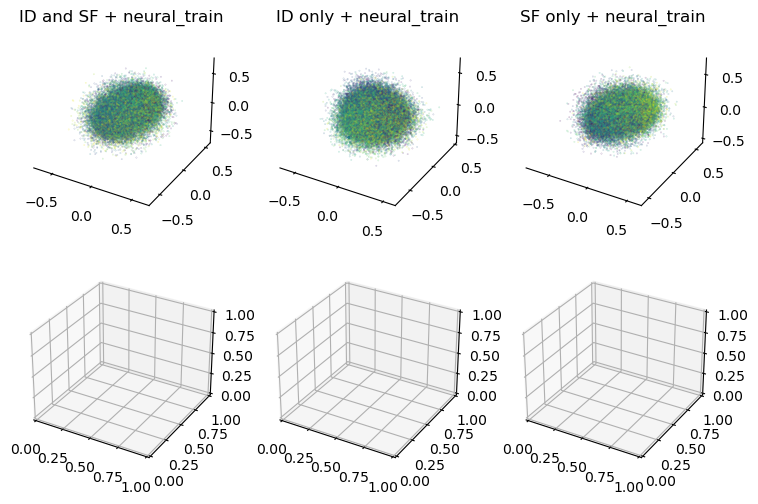

In [1055]:
fig=plt.figure(figsize=(9,6))

ax1=plt.subplot(231, projection = '3d')
ax2=plt.subplot(232, projection = '3d')
ax3=plt.subplot(233, projection = '3d')

ax4=plt.subplot(234, projection = '3d')
ax5=plt.subplot(235, projection = '3d')
ax6=plt.subplot(236, projection = '3d')


ax1=cebra.plot_embedding(ax=ax1, embedding=cebra_posdir_all_m1, embedding_labels='time', title='ID and SF + neural_train')
ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all_m1, embedding_labels='time', title='ID only + neural_train')
ax3=cebra.plot_embedding(ax=ax3, embedding=cebra_dir_all_m1, embedding_labels='time', title='SF only + neural_train')

ax4=cebra.plot_embedding(ax=ax4, embedding=cebra_posdir_train_m1, embedding_labels=label_train[:,0], title='ID and SF + neural_train')
ax5=cebra.plot_embedding(ax=ax5, embedding=cebra_pos_train_m1, embedding_labels=label_train[:,0], title='ID only + neural_train')
ax6=cebra.plot_embedding(ax=ax6, embedding=cebra_dir_train_m1, embedding_labels=label_train[:,1], title='SF only + neural_train')


# ax2=cebra.plot_embedding(ax=ax2, embedding=cebra_pos_all, embedding_labels=label_train[:,0], title='ID only + all neural_data')


cebra-hybrid model

Text(0.5, 0.98, 'CEBRA Hybrid Model')

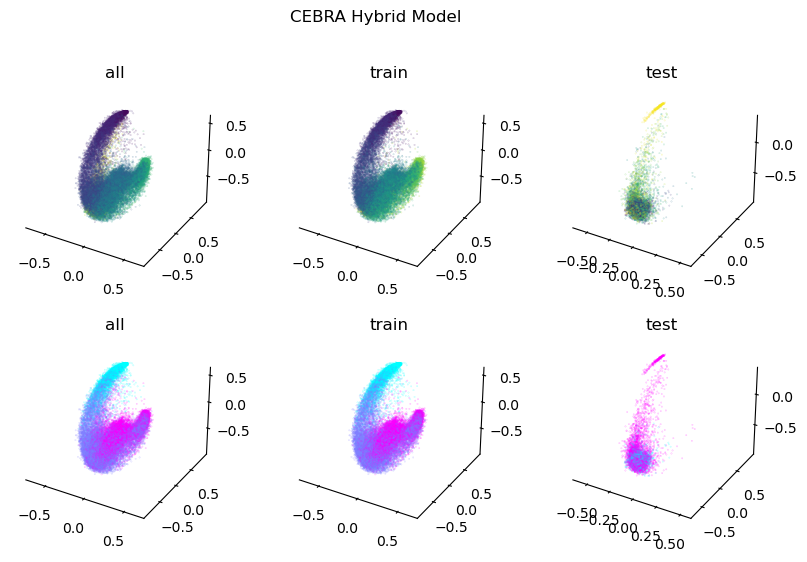

In [ ]:
MI = 1000
OD = 32
current_datetime = '2024-05-06_19-41-47'
path = r"C:\Users\user\Documents\github\RNN_reaching_task\cebra_models\reach1_4\02\A\cebra_trialID_hybrid_model_1000_32_reach1_4_A_2024-05-06_19-41-47.pt"

# cebra_pos_hybrid_model = cebra.CEBRA.load(f"decoding_models/cebra_trialID_hybrid_model_{MI}_{OD}_{M}_{P}_{current_datetime}.pt")
cebra_pos_hybrid_model_m1 = cebra.CEBRA.load(path)

cebra_hybrid_all_m1 = cebra_pos_hybrid_model_m1.transform(neural_data_transposed)
cebra_pos_hybrid_train_m1 = cebra_pos_hybrid_model_m1.transform(neural_train)
cebra_pos_hybrid_test_m1 = cebra_pos_hybrid_model_m1.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_hybrid_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_pos_hybrid_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_pos_hybrid_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_hybrid_all_m1, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_pos_hybrid_train_m1, embedding_labels=label_train[:,0], title='train')
ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_pos_hybrid_test_m1, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA Hybrid Model')

In [ ]:
discete_lables.shape

(61160, 2)

In [1056]:

neural_data_transposed.shape
discete_lables = discete_lables[:44000]
discete_lables.shape

(44000, 2)

Text(0.5, 0.98, 'CEBRA-Time Model, M1')

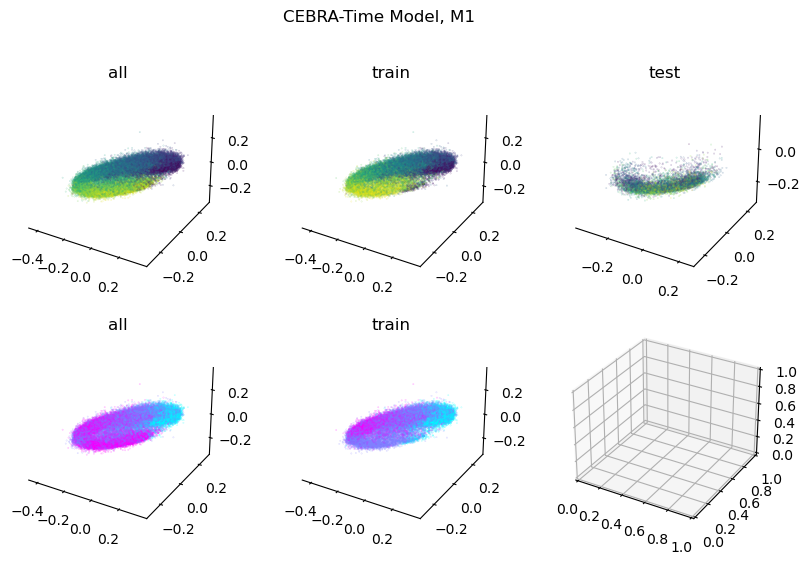

In [1057]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'
path_filtered_units = 'cebra_TimeOnly_model_2500_32_reach1_4_A_2024-05-09_16-34-28.pt'


cebra_time_model_m1 = cebra.CEBRA.load(f'time_only_models/{path_filtered_units}')
cebra_time_all_m1 = cebra_time_model_m1.transform(neural_data_transposed)
cebra_time_train_m1 = cebra_time_model_m1.transform(neural_train)
cebra_time_test_m1 = cebra_time_model_m1.transform(neural_test)

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(231, projection='3d')  # First row, first column
ax2 = plt.subplot(232, projection='3d')  # First row, second column
ax3 = plt.subplot(233, projection='3d')  # First row, second column
ax4 = plt.subplot(234, projection='3d')  # First row, second column
ax5 = plt.subplot(235, projection='3d')  # First row, second column
ax6 = plt.subplot(236, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=cebra_time_all_m1, embedding_labels='time', title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=cebra_time_train_m1, embedding_labels='time', title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=cebra_time_test_m1, embedding_labels='time', title='test')
ax4 = cebra.plot_embedding(ax=ax4,embedding=cebra_time_all_m1, embedding_labels=discete_lables[:,0], title='all')
ax5 = cebra.plot_embedding(ax=ax5,embedding=cebra_time_train_m1, embedding_labels=label_train[:,0], title='train')
# ax6 = cebra.plot_embedding(ax=ax6,embedding=cebra_time_test_m1, embedding_labels=label_test[:,0], title='test')
# add title
plt.suptitle('CEBRA-Time Model, M1')

Set what embeddings to use

In [1107]:
m1_embedding_train = cebra_time_train_m1
m1_embedding_all = cebra_time_all_m1
m1_embedding_all.shape
# m1_embedding_train= cebra_pos_hybrid_train_m1
# m1_embedding_all = cebra_hybrid_all_m1


(44000, 32)

In [1059]:
# mthal_embedding_train = cebra_pos_hybrid_train_mthal
# mthal_embedding_all = cebra_hybrid_all_mthal
mthal_embedding_all= cebra_time_all_mthal
mthal_embedding_train = cebra_time_train_mthal

Double check what you using to train the rnn

In [1060]:
mthal_embedding_all.shape

(61160, 32)

Text(0.5, 0.98, 'checking embeddings used to train')

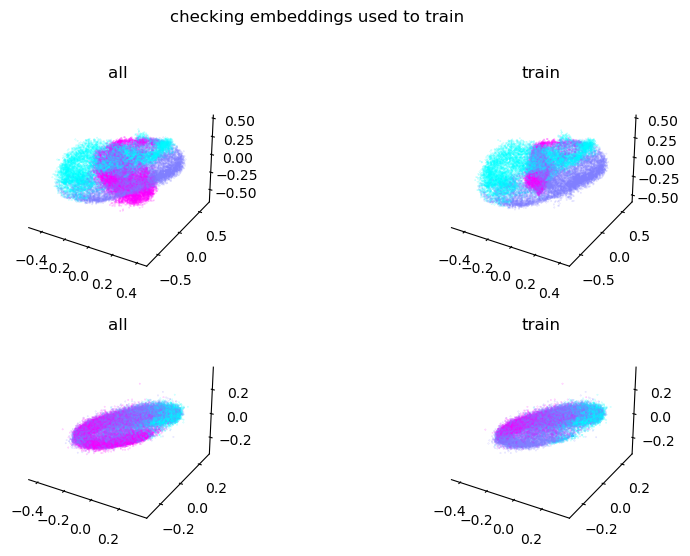

In [1061]:

plt.figure(figsize=(10, 6))
#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column


ax1 = cebra.plot_embedding(ax=ax1,embedding=mthal_embedding_all[0:44000,:], embedding_labels=discete_lables[:,0], title='all')
ax2 = cebra.plot_embedding(ax=ax2,embedding=mthal_embedding_train[0:35200,:], embedding_labels=label_train[:,0], title='train')
ax3 = cebra.plot_embedding(ax=ax3,embedding=m1_embedding_all, embedding_labels=discete_lables[:,0], title='all')
ax4 = cebra.plot_embedding(ax=ax4,embedding=m1_embedding_train, embedding_labels=label_train[:,0], title='train')

# add title
plt.suptitle('checking embeddings used to train')

### 4. Convert Data into correctly shapped df

Turning neural_data and embedding data into to a df that is time bins by units for neural data. Or timebins by embeddings for embedding data
- you need each row to be a single time bin
- each column is a unit. 


In [1062]:
mthal_neural_data_original

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [20.,  0., 40., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [1063]:
# Conver neural data into a df that is (bins , features) = (units, timebins)
data_mthal_neuralData_T = mthal_neural_data_original.T
data_mthal_neuralData = pd.DataFrame(data_mthal_neuralData_T)
data_mthal_neuralData = data_mthal_neuralData.ffill()
print(data_mthal_neuralData.shape)
data_mthal_neuralData.head(2)

(61160, 538)


0    1    2    3     4     5     6    7    8    9    ...  528   529  530  \
0  0.0  0.0  0.0  0.0  40.0  20.0  40.0  0.0  0.0  0.0  ...  0.0  20.0  0.0   
1  0.0  0.0  0.0  0.0  40.0  20.0   0.0  0.0  0.0  0.0  ...  0.0   0.0  0.0   

   531  532  533  534   535  536  537  
0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 538 columns]

In [1069]:
# Conver neural data into a df that is (bins , features) = (units, timebins)\
data_m1_neuralData_T = m1_neural_data
print(data_m1_neuralData_T.shape)
data_m1_neuralData = pd.DataFrame(data_m1_neuralData_T)
data_m1_neuralData = data_m1_neuralData.ffill()
print(data_m1_neuralData.shape)
data_m1_neuralData.head(2)

(44000, 21)
(44000, 21)


0     1    2    3    4    5     6    7     8    9   ...    11   12    13  \
0  40.0  20.0  0.0  0.0  0.0  0.0  20.0  0.0   0.0  0.0  ...  20.0  0.0  40.0   
1  80.0  20.0  0.0  0.0  0.0  0.0   0.0  0.0  20.0  0.0  ...   0.0  0.0  20.0   

    14    15    16   17   18   19   20  
0  0.0  40.0  20.0  0.0  0.0  0.0  0.0  
1  0.0  20.0   0.0  0.0  0.0  0.0  0.0  

[2 rows x 21 columns]

embeddings

In [914]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_m1_embedding_T = m1_embedding_all
data_m1_embedding = pd.DataFrame(data_m1_embedding_T)
data_m1_embedding = data_m1_embedding.ffill()
print(data_m1_embedding.shape)
data_m1_embedding.head(2)

(44000, 32)


0         1         2         3         4         5         6   \
0  0.251258  0.152543  0.090319 -0.333113  0.153020 -0.180080  0.013479   
1  0.258185  0.146115  0.095225 -0.332090  0.149124 -0.172668  0.033306   

         7         8         9   ...        22        23        24        25  \
0 -0.209568  0.061602 -0.359873  ...  0.212856  0.137069  0.254419 -0.009874   
1 -0.199478  0.072456 -0.351447  ...  0.218184  0.138397  0.259227  0.000453   

         26        27        28        29        30        31  
0 -0.128421  0.215940  0.107199 -0.162328 -0.023628  0.067157  
1 -0.155679  0.204481  0.116154 -0.139455 -0.030528  0.068973  

[2 rows x 32 columns]

In [915]:
# Conver neural embeddings into a df that is (bins , features) = (units, embeddings)
data_mthal_embedding_T = mthal_embedding_all
data_mthal_embedding = pd.DataFrame(data_mthal_embedding_T)
data_mthal_embedding = data_mthal_embedding.ffill()
print(data_mthal_embedding.shape)
data_mthal_embedding.head(2)

(61160, 32)


0         1         2         3         4         5         6   \
0 -0.015637  0.406981  0.166465 -0.204488  0.064744 -0.065235 -0.321402   
1 -0.025242  0.398936  0.177669 -0.190722  0.069609 -0.072161 -0.324818   

         7         8         9   ...        22        23        24        25  \
0  0.131802  0.132240 -0.042215  ...  0.094831 -0.044322  0.027663 -0.102902   
1  0.124397  0.135454 -0.022158  ...  0.097464 -0.020535  0.002429 -0.099985   

         26        27        28        29        30        31  
0  0.064785  0.053596  0.098654  0.042460  0.062349 -0.119618  
1  0.051914  0.035560  0.096073  0.057147  0.055696 -0.135972  

[2 rows x 32 columns]

<Axes3D: title={'center': 'ID only + neural_train'}>

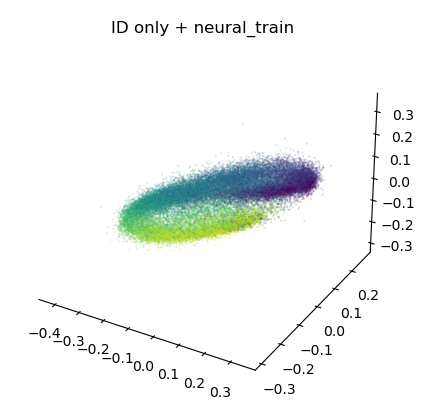

In [916]:
data_m1_embedding_T
cebra.plot_embedding(embedding=data_m1_embedding_T, embedding_labels='time', title='ID only + neural_train')

Covert which dataframes you want into data, so it can be fit into rest of code

In [917]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [918]:
data_mthal_embedding[0].to_numpy().shape

(61160,)

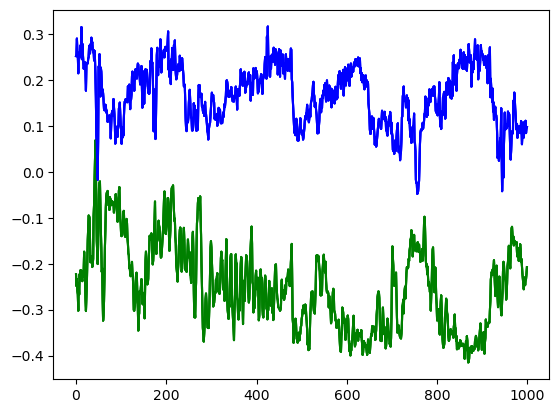

In [919]:
time_start = 5000
time_end = 6000

embedding_mthal = data_mthal_embedding[0].to_numpy()[time_start:time_end] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[time_start:time_end] # pert1
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[time_start:time_end] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[time_start:time_end] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
embedding_mthal = data_mthal_embedding[0].to_numpy()[time_start:time_end] #base
embedding_m1 = data_m1_embedding[0].to_numpy()[time_start:time_end] # pert1
# embedding_5 = data_mthal_embedding[0].to_numpy()[25200:31500] # wash3
plt.plot(embedding_mthal,color='green')
plt.plot(embedding_m1,color='blue')
# plt.plot(embedding_3,color='red')

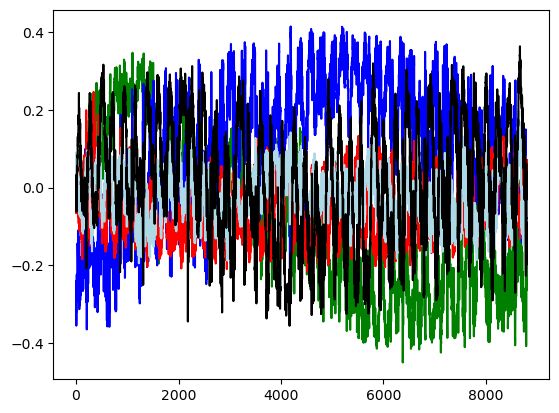

In [920]:
bins_per_trail = 220 * 40

embedding_1 = data_mthal_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_mthal_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_mthal_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_mthal_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_mthal_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
plt.plot(embedding_3,color='red')
plt.plot(embedding_4,color='lightblue')
plt.plot(embedding_5,color='darkred')
plt.plot(embedding_6,color='black')
plt.show()

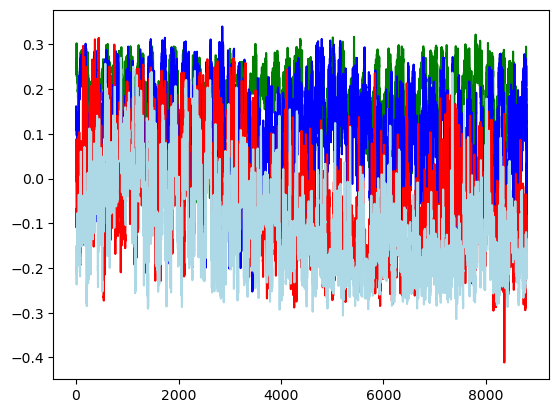

In [921]:
bins_per_trail = 220 * 40

embedding_1 = data_m1_embedding[0].to_numpy()[0*bins_per_trail:bins_per_trail] #base
embedding_2 = data_m1_embedding[0].to_numpy()[bins_per_trail:bins_per_trail*2] # pert1
embedding_3 = data_m1_embedding[0].to_numpy()[bins_per_trail*2:bins_per_trail*3] # wash1
embedding_4 = data_m1_embedding[0].to_numpy()[bins_per_trail*3:bins_per_trail*4] # pert2
embedding_5 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*5] # pert2
embedding_6 = data_m1_embedding[0].to_numpy()[bins_per_trail*5:bins_per_trail*6] # pert2


plt.plot(embedding_1,color='green')
plt.plot(embedding_2,color='blue')
plt.plot(embedding_3,color='red')
plt.plot(embedding_4,color='lightblue')
plt.plot(embedding_5,color='darkred')
plt.plot(embedding_6,color='black')
plt.show()

check embeddings and FR of M1 and Mthal

In [922]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.ndimage import gaussian_filter1d

def view_units(unit_to_view, second_unit_to_view, third_unit_to_view, reaches_to_view):
    plt.close('all')  # Close any previous plots

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # Define subplots for firing rates
    ax1 = fig.add_subplot(4, 3, 1)
    ax2 = fig.add_subplot(4, 3, 2)
    ax3 = fig.add_subplot(4, 3, 3)

    # Define subplots for embeddings
    ax4 = fig.add_subplot(4, 3, 4)
    ax5 = fig.add_subplot(4, 3, 5)
    ax6 = fig.add_subplot(4, 3, 6)

    ax7 = fig.add_subplot(4, 3, 7)
    ax8 = fig.add_subplot(4, 3, 8)
    ax9 = fig.add_subplot(4, 3, 9)

    ax10 = fig.add_subplot(4, 3, 10, projection='3d')
    ax11 = fig.add_subplot(4, 3, 11, projection='3d')

    # Function to smooth data
    def smooth_data(data, sigma=2):
        return gaussian_filter1d(data, sigma=sigma)

    # Colors for different reaches
    colors = plt.cm.viridis(np.linspace(0, 1, len(reaches_to_view)))

    # Iterate over reaches to view and plot the data
    for i, reach in enumerate(reaches_to_view):
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch firing rates for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_m1_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]

        # Fetch embeddings for the specified reach
        unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

        embedding_1 = data_mthal_embedding[3].to_numpy()[reach_start:reach_end]
        embedding_2 = data_mthal_embedding[4].to_numpy()[reach_start:reach_end]
        embedding_3 = data_mthal_embedding[5].to_numpy()[reach_start:reach_end]

        embedding_1_m1 = data_m1_embedding[3].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[4].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[5].to_numpy()[reach_start:reach_end]

        # Plot smoothed firing rates
        ax1.plot(smooth_data(unit_frs), label=f'Reach {reach}', color=colors[i])
        ax2.plot(smooth_data(second_unit_frs), label=f'Reach {reach}', color=colors[i])
        ax3.plot(smooth_data(third_unit_frs), label=f'Reach {reach}', color=colors[i])

        # Plot embeddings for Mthal
        ax4.plot(unit_embedding, label=f'Reach {reach}', color=colors[i])
        ax5.plot(second_unit_embedding, label=f'Reach {reach}', color=colors[i])
        ax6.plot(third_unit_embedding, label=f'Reach {reach}', color=colors[i])

        # Plot embeddings for M1
        ax7.plot(embedding_1_m1, label=f'Reach {reach}', color=colors[i])
        ax8.plot(embedding_2_m1, label=f'Reach {reach}', color=colors[i])
        ax9.plot(embedding_3_m1, label=f'Reach {reach}', color=colors[i])

        # Plot 3D embeddings for Mthal and M1
        if i == 0:  # Plot the 3D embeddings for the first reach to set the scene
            ax10.plot(unit_embedding, second_unit_embedding, embedding_1, color=colors[i], label=f'Reach {reach}')
            ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, color=colors[i], label=f'Reach {reach}')

    # # Enhance the plot with titles, labels, legends, and grids
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]:
    #     ax.legend()
    #     ax.grid(True)

    ax1.set_title(f"Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Unit {third_unit_to_view} Firing Rate")

    ax4.set_title("Mthal First Embedding")
    ax5.set_title("Mthal Second Embedding")
    ax6.set_title("Mthal Third Embedding")

    ax7.set_title("M1 First Embedding")
    ax8.set_title("M1 Second Embedding")
    ax9.set_title("M1 Third Embedding")

    ax10.set_title("Mthal 3D Embedding")
    ax11.set_title("M1 3D Embedding")

    fig.suptitle('Neural Firing Rates and Embeddings')

    plt.tight_layout()
    plt.show()


In [923]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.ndimage import gaussian_filter1d

def view_units(unit_to_view_mthal, second_unit_to_view_mthal, third_unit_to_view_mthal,unit_to_view_m1, second_unit_to_view_m1, third_unit_to_view_m1, reaches_to_view):
    plt.close('all')  # Close any previous plots

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 18))

    # Define subplots for Mthal firing rates (first row)
    ax1 = fig.add_subplot(5, 3, 1)
    ax2 = fig.add_subplot(5, 3, 2)
    ax3 = fig.add_subplot(5, 3, 3)

    # Define subplots for M1 firing rates (second row)
    ax4 = fig.add_subplot(5, 3, 4)
    ax5 = fig.add_subplot(5, 3, 5)
    ax6 = fig.add_subplot(5, 3, 6)

    # Define subplots for Mthal embeddings (third row)
    ax7 = fig.add_subplot(5, 3, 7)
    ax8 = fig.add_subplot(5, 3, 8)
    ax9 = fig.add_subplot(5, 3, 9)

    # Define subplots for M1 embeddings (fourth row)
    ax10 = fig.add_subplot(5, 3, 10)
    ax11 = fig.add_subplot(5, 3, 11)
    ax12 = fig.add_subplot(5, 3, 12)

    # Define subplots for 3D embeddings (fifth row)
    ax13 = fig.add_subplot(5, 3, 13, projection='3d')
    ax14 = fig.add_subplot(5, 3, 14, projection='3d')

    # Function to smooth data
    def smooth_data(data, sigma=2):
        return gaussian_filter1d(data, sigma=sigma)

    # Colors for different reaches
    colors = plt.cm.viridis(np.linspace(0, 1, len(reaches_to_view)))

    # Iterate over reaches to view and plot the data
    for i, reach in enumerate(reaches_to_view):
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch Mthal firing rates for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view_mthal].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view_mthal].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view_mthal].to_numpy()[reach_start:reach_end]

        # Fetch M1 firing rates for the specified reach
        first_unit_frs_m1 = data_m1_neuralData[unit_to_view_m1].to_numpy()[reach_start:reach_end]
        second_unit_frs_m1 = data_m1_neuralData[second_unit_to_view_m1].to_numpy()[reach_start:reach_end]
        third_unit_frs_m1 = data_m1_neuralData[third_unit_to_view_m1].to_numpy()[reach_start:reach_end]

        # Fetch Mthal embeddings for the specified reach
        unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

        # Fetch M1 embeddings for the specified reach
        embedding_1_m1 = data_m1_embedding[3].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[4].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[5].to_numpy()[reach_start:reach_end]

        # Plot smoothed Mthal firing rates
        ax1.plot(smooth_data(unit_frs), label=f'Reach {reach}', color=colors[i])
        ax2.plot(smooth_data(second_unit_frs), label=f'Reach {reach}', color=colors[i])
        ax3.plot(smooth_data(third_unit_frs), label=f'Reach {reach}', color=colors[i])

        # Plot smoothed M1 firing rates
        ax4.plot(smooth_data(first_unit_frs_m1), label=f'Reach {reach}', color=colors[i])
        ax5.plot(smooth_data(second_unit_frs_m1), label=f'Reach {reach}', color=colors[i])
        ax6.plot(smooth_data(third_unit_frs_m1), label=f'Reach {reach}', color=colors[i])

        # Plot Mthal embeddings
        ax7.plot(unit_embedding, label=f'Reach {reach}', color=colors[i])
        ax8.plot(second_unit_embedding, label=f'Reach {reach}', color=colors[i])
        ax9.plot(third_unit_embedding, label=f'Reach {reach}', color=colors[i])

        # Plot M1 embeddings
        ax10.plot(embedding_1_m1, label=f'Reach {reach}', color=colors[i])
        ax11.plot(embedding_2_m1, label=f'Reach {reach}', color=colors[i])
        ax12.plot(embedding_3_m1, label=f'Reach {reach}', color=colors[i])

        # Plot 3D embeddings for Mthal and M1
        ax13.plot(unit_embedding, second_unit_embedding, third_unit_embedding, color=colors[i], label=f'Reach {reach}')
        ax14.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, color=colors[i], label=f'Reach {reach}')

    # Set titles for the plots
    ax1.set_title(f"Mthal Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mthal Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mthal Unit {third_unit_to_view} Firing Rate")

    ax4.set_title(f"M1 Unit {unit_to_view} Firing Rate")
    ax5.set_title(f"M1 Unit {second_unit_to_view} Firing Rate")
    ax6.set_title(f"M1 Unit {third_unit_to_view} Firing Rate")

    ax7.set_title("Mthal First Embedding")
    ax8.set_title("Mthal Second Embedding")
    ax9.set_title("Mthal Third Embedding")

    ax10.set_title("M1 First Embedding")
    ax11.set_title("M1 Second Embedding")
    ax12.set_title("M1 Third Embedding")

    ax13.set_title("Mthal 3D Embedding")
    ax14.set_title("M1 3D Embedding")

    # Enhance layout and display the plot
    fig.tight_layout(pad=3.0)
    plt.show()


In [924]:
m1_good_unit_indexs = [1, 7,  8,  9, 10, 12, 13, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 35, 41, 44,]
len(m1_good_unit_indexs)

21

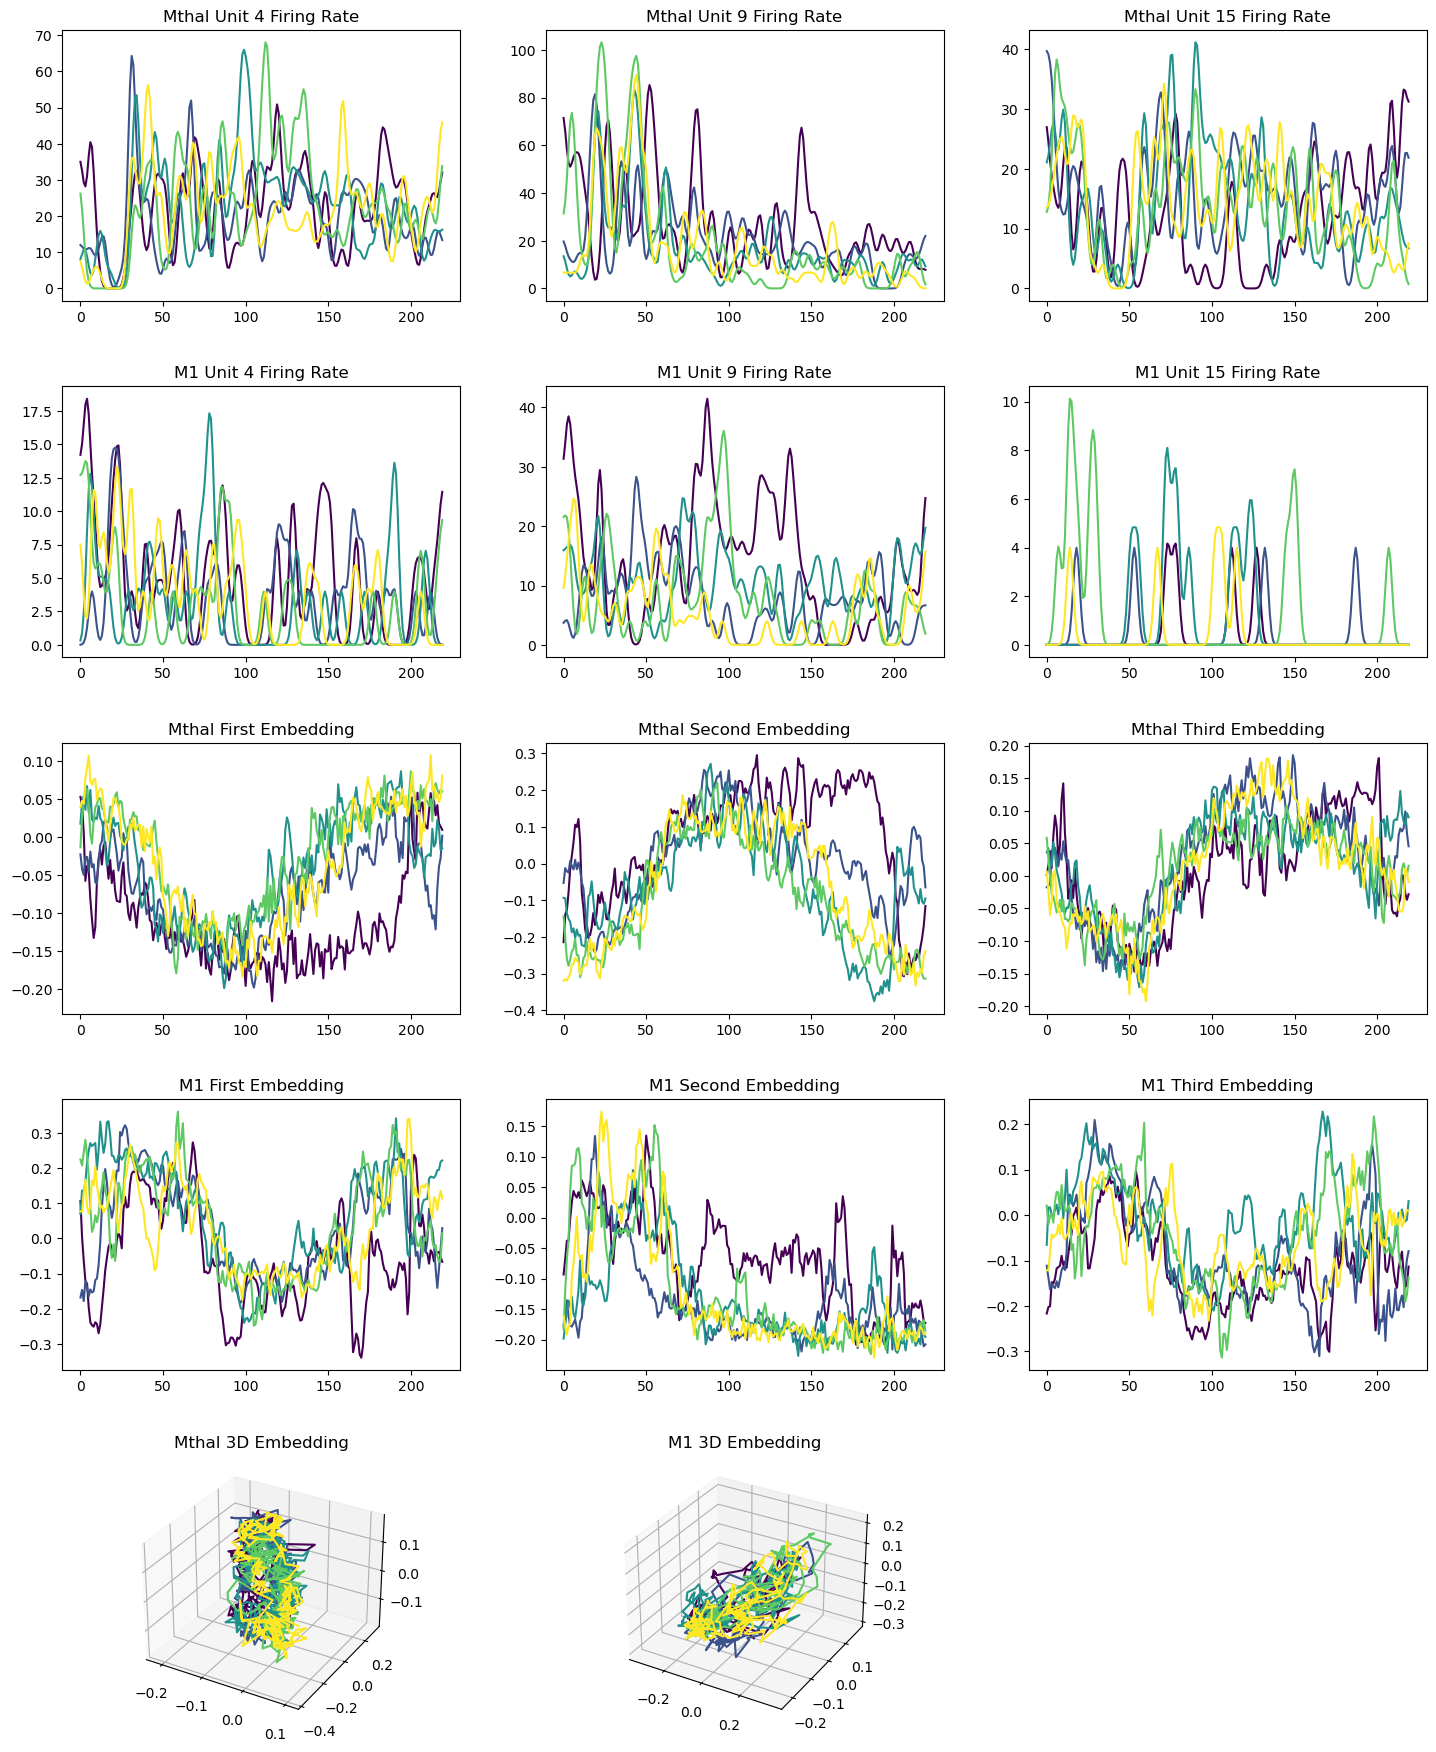

In [925]:
unit_to_view_mthal = 4
second_unit_to_view_mthal=9
third_unit_to_view_mthal=15

unit_to_view_m1 =13
second_unit_to_view_m1 = 29
third_unit_to_view_m1 = 21

reaches_to_view = range(100, 105)  # Range of reaches to display
view_units(unit_to_view_mthal, second_unit_to_view_mthal, third_unit_to_view_mthal,unit_to_view_m1, second_unit_to_view_m1, third_unit_to_view_m1,reaches_to_view)

Convert Data frames into correct Input and Target Shapes

In [926]:
# data = data_m1_neuralData
# data = data_mthal_neuralData
# data = data_mthal_embedding
# data = data_m1_embedding

In [927]:
data_m1_embedding.head()

0         1         2         3         4         5         6   \
0  0.251258  0.152543  0.090319 -0.333113  0.153020 -0.180080  0.013479   
1  0.258185  0.146115  0.095225 -0.332090  0.149124 -0.172668  0.033306   
2  0.233546  0.138606  0.118119 -0.328495  0.130883 -0.217327  0.016684   
3  0.250913  0.134540  0.123475 -0.341729  0.135313 -0.224809  0.048923   
4  0.253056  0.147473  0.112429 -0.341482  0.119979 -0.226602  0.008306   

         7         8         9   ...        22        23        24        25  \
0 -0.209568  0.061602 -0.359873  ...  0.212856  0.137069  0.254419 -0.009874   
1 -0.199478  0.072456 -0.351447  ...  0.218184  0.138397  0.259227  0.000453   
2 -0.230539  0.084567 -0.326758  ...  0.197737  0.106979  0.251430 -0.031124   
3 -0.209932  0.110425 -0.330495  ...  0.179218  0.097098  0.257572 -0.014754   
4 -0.228890  0.117555 -0.321236  ...  0.160740  0.074145  0.243000 -0.049393   

         26        27        28        29        30        31  
0 -0.128421  0.215940  0.107199 -0.162328 -0.023628  0.067157  
1 -0.155679  0.204481  0.116154 -0.139455 -0.030528  0.068973  
2 -0.179523  0.212798  0.098123 -0.097347  0.000600  0.054571  
3 -0.199789  0.209852  0.094338 -0.093792  0.011807  0.047388  
4 -0.204219  0.251591  0.116595 -0.069125  0.038000  0.021415  

[5 rows x 32 columns]

In [928]:
data_mthal_embedding.head()

0         1         2         3         4         5         6   \
0 -0.015637  0.406981  0.166465 -0.204488  0.064744 -0.065235 -0.321402   
1 -0.025242  0.398936  0.177669 -0.190722  0.069609 -0.072161 -0.324818   
2 -0.016251  0.397371  0.181832 -0.192369  0.076351 -0.054525 -0.329100   
3 -0.016547  0.375752  0.187431 -0.225253  0.069713 -0.059301 -0.327082   
4 -0.001769  0.355720  0.179429 -0.254513  0.040323 -0.056358 -0.304081   

         7         8         9   ...        22        23        24        25  \
0  0.131802  0.132240 -0.042215  ...  0.094831 -0.044322  0.027663 -0.102902   
1  0.124397  0.135454 -0.022158  ...  0.097464 -0.020535  0.002429 -0.099985   
2  0.128398  0.136818 -0.039634  ...  0.098343 -0.015604 -0.001244 -0.085564   
3  0.101649  0.128980 -0.050475  ...  0.082466 -0.059466  0.019614 -0.071398   
4  0.080656  0.119859 -0.054576  ...  0.106141 -0.126688  0.040213 -0.099998   

         26        27        28        29        30        31  
0  0.064785  0.053596  0.098654  0.042460  0.062349 -0.119618  
1  0.051914  0.035560  0.096073  0.057147  0.055696 -0.135972  
2  0.039650  0.041311  0.073873  0.066599  0.066728 -0.139580  
3  0.038000  0.076543  0.064734  0.062728  0.096867 -0.118303  
4  0.041366  0.066128  0.069432  0.030093  0.113554 -0.072679  

[5 rows x 32 columns]

Adapt the neural or embedding data into train, validate and test sets

In [929]:
data_mthal_neuralData = data_mthal_neuralData[0:44000]
data_mthal_neuralData

0     1    2     3     4     5     6     7    8     9    ...  528  \
0       0.0   0.0  0.0   0.0  40.0  20.0  40.0   0.0  0.0   0.0  ...  0.0   
1       0.0   0.0  0.0   0.0  40.0  20.0   0.0   0.0  0.0   0.0  ...  0.0   
2       0.0   0.0  0.0   0.0   0.0  40.0  40.0   0.0  0.0   0.0  ...  0.0   
3       0.0   0.0  0.0   0.0  60.0   0.0  20.0   0.0  0.0   0.0  ...  0.0   
4       0.0   0.0  0.0   0.0  20.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
...     ...   ...  ...   ...   ...   ...   ...   ...  ...   ...  ...  ...   
43995   0.0   0.0  0.0   0.0  20.0   0.0   0.0  20.0  0.0   0.0  ...  0.0   
43996  20.0  20.0  0.0  20.0   0.0   0.0   0.0  20.0  0.0   0.0  ...  0.0   
43997   0.0   0.0  0.0   0.0  20.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   
43998   0.0  20.0  0.0   0.0  40.0   0.0   0.0   0.0  0.0  40.0  ...  0.0   
43999   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...  0.0   

        529  530  531  532  533  534   535   536  537  
0      20.0  0.0  0.0  0.0  0.0  0.0  20.0   0.0  0.0  
1       0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
2      40.0  0.0  0.0  0.0  0.0  0.0  40.0   0.0  0.0  
3      20.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
4       0.0  0.0  0.0  0.0  0.0  0.0  20.0   0.0  0.0  
...     ...  ...  ...  ...  ...  ...   ...   ...  ...  
43995   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
43996   0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  
43997   0.0  0.0  0.0  0.0  0.0  0.0   0.0  20.0  0.0  
43998   0.0  0.0  0.0  0.0  0.0  0.0   0.0  20.0  0.0  
43999  20.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  

[44000 rows x 538 columns]

In [930]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming data_mthal_embedding and data_m1_embedding are your DataFrame names:
PREDICTORS = data_mthal_neuralData.columns  # These are all columns in the Mthal embedding DataFrame
TARGET = data_m1_embedding.columns  # These are all columns in the M1 embedding DataFrame


scale the data. take the mean of columns and find SD and so on

In [931]:
scale_taret = True

In [932]:
load_path = f'discrete_lables/{mouse}_trial_ID_SF.npy'
discrete_labled_loaded = np.load(load_path)
discete_lables = discrete_labled_loaded
discete_lables.shape
np.unique(discete_lables[:,0]), np.unique(discete_lables[:,1]), discete_lables.shape

(array([0., 1., 2.]), array([0., 1.]), (61160, 2))

In [933]:
# # Split data into training, validation, and test sets first
# total_samples = len(data_mthal_embedding)
# train_size = int(0.70 * total_samples)
# valid_size = int(0.85 * total_samples)

# # Split predictors (Mthal embeddings)
# train_x_notScaled = data_mthal_neuralData.iloc[:train_size]
# valid_x_notScaled = data_mthal_neuralData.iloc[train_size:valid_size]
# test_x_notScaled = data_mthal_neuralData.iloc[valid_size:]

# # Split targets (M1 embeddings)
# train_y_notScaled = data_m1_embedding.iloc[:train_size]
# valid_y_notScaled = data_m1_embedding.iloc[train_size:valid_size]
# test_y_notScaled = data_m1_embedding.iloc[valid_size:]

# # split the discete_lables 
# train_labels = discete_lables[:train_size]
# valid_labels = discete_lables[train_size:valid_size]
# test_labels = discete_lables[valid_size:]


In [934]:
import numpy as np
import pandas as pd

# Number of time bins in each reach
time_bins_per_reach = 220

# Total number of reaches (ensure this is an integer)
total_reaches = len(data_mthal_neuralData) // time_bins_per_reach

# Compute the number of reaches in each dataset segment
train_reaches = int(0.70 * total_reaches)
valid_reaches = int(0.15 * total_reaches)
test_reaches = total_reaches - train_reaches - valid_reaches

# Ensure the split indices are for the full dataset with complete reaches
train_size = train_reaches * time_bins_per_reach
valid_size = (train_reaches + valid_reaches) * time_bins_per_reach

# Now split the data using these indices
# Split predictors (Mthal neural data)
train_x_notScaled = data_mthal_neuralData.iloc[:train_size]
valid_x_notScaled = data_mthal_neuralData.iloc[train_size:valid_size]
test_x_notScaled = data_mthal_neuralData.iloc[valid_size:]

# Split targets (M1 embeddings)
train_y_notScaled = data_m1_embedding.iloc[:train_size]
valid_y_notScaled = data_m1_embedding.iloc[train_size:valid_size]
test_y_notScaled = data_m1_embedding.iloc[valid_size:]

# Split the discrete labels similarly
train_labels = discete_lables[:train_size]
valid_labels = discete_lables[train_size:valid_size]
test_labels = discete_lables[valid_size:]

# Show shapes to confirm the split
print("Train data shape:", train_x_notScaled.shape, train_y_notScaled.shape)
print("Validation data shape:", valid_x_notScaled.shape, valid_y_notScaled.shape)
print("Test data shape:", test_x_notScaled.shape, test_y_notScaled.shape)


Train data shape: (30800, 538) (30800, 32)
Validation data shape: (6600, 538) (6600, 32)
Test data shape: (6600, 538) (6600, 32)


In [935]:
scale_target = True

In [936]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler for predictors (Mthal embeddings)
scaler_predictors = StandardScaler()

# Fit and transform the training predictors
train_x = scaler_predictors.fit_transform(train_x_notScaled)
# Transform the validation and test predictors
valid_x = scaler_predictors.transform(valid_x_notScaled)
test_x = scaler_predictors.transform(test_x_notScaled)

# Initialize and apply the scaler for targets (M1 embeddings), if scaling the targets
if scale_target:
    scaler_targets = StandardScaler()
    train_y = scaler_targets.fit_transform(train_y_notScaled)
    valid_y = scaler_targets.transform(valid_y_notScaled)
    test_y = scaler_targets.transform(test_y_notScaled)
    print('Scaling Target Embeddings')
else:
    print('Not Scaling Target Embeddings')


Scaling Target Embeddings


In [937]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 

Train X: (30800, 538) [-0.74053284 -0.76279676 -0.03128582]
Train Y: (30800, 32) [1.38454588 1.4635578  0.06815625]
Validation X: (6600, 538) [-0.74053284  0.0511914  -0.03128582]
Validation Y: (6600, 32) [-1.52801662  0.78567585 -3.3030492 ]
Test X: (6600, 538) [ 1.20815454  0.86517956 -0.03128582]
Test Y: (6600, 32) [-0.60888724  0.86143164 -2.99872638]


51986

Split discete_lables up to match the index location used for train_x, valid_x and test_x

In [938]:
label_test_split = discete_lables[51700:]
label_test_split.shape

(9460, 2)

looking at embeddings used for training, validation and test sets

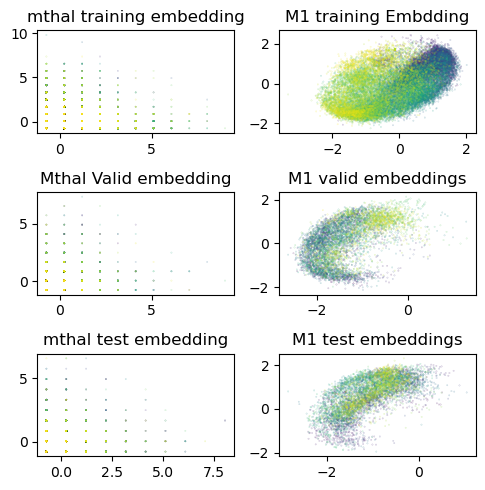

In [939]:
plt.figure(figsize=(5, 5))

index_order = (0,1)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321)  # First row, first column
ax2 = plt.subplot(322)  # First row, second column
ax3 = plt.subplot(323)  # Second row, first column
ax4 = plt.subplot(324)  # Second row, second column
ax5 = plt.subplot(325)  # Third row, first column
ax6 = plt.subplot(326)  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


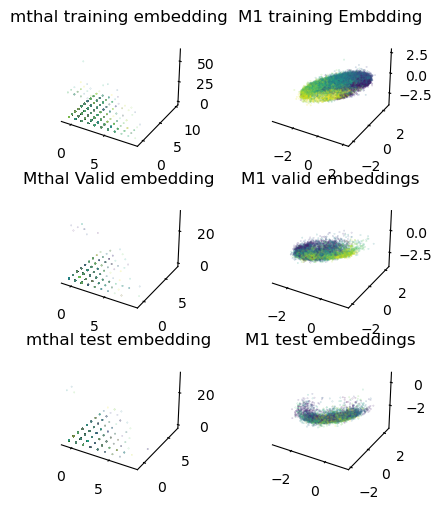

In [940]:
plt.figure(figsize=(5, 5))

index_order = (0,1,2)

# Creating each subplot in the 3x2 grid
ax1 = plt.subplot(321, projection='3d')  # First row, first column
ax2 = plt.subplot(322, projection='3d')  # First row, second column
ax3 = plt.subplot(323, projection='3d')  # Second row, first column
ax4 = plt.subplot(324, projection='3d')  # Second row, second column
ax5 = plt.subplot(325, projection='3d')  # Third row, first column
ax6 = plt.subplot(326, projection='3d')  # Third row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=train_x, embedding_labels='time', title='mthal training embedding')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_y, embedding_labels='time', title='M1 training Embdding')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=valid_x, embedding_labels='time', title='Mthal Valid embedding')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=valid_y, embedding_labels='time', title='M1 valid embeddings')
ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=test_x, embedding_labels='time', title='mthal test embedding')
ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=test_y, embedding_labels='time', title='M1 test embeddings')
plt.tight_layout()  # Adjust subplots to fit into figure area.


<Axes3D: title={'center': 'training M1 Target embeddings'}>

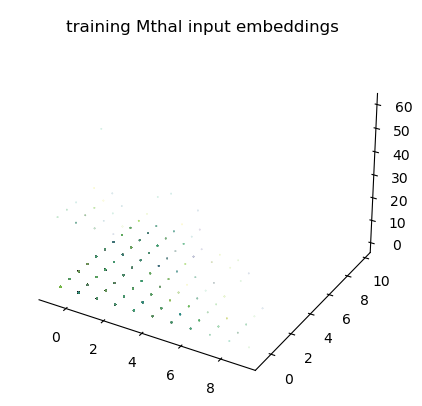

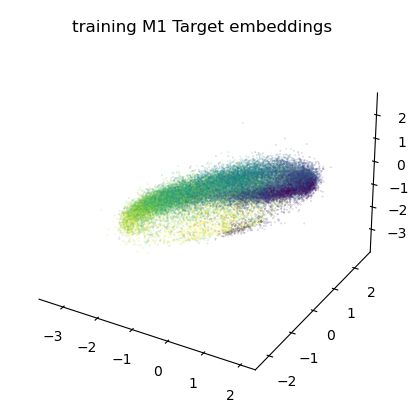

In [941]:

cebra.plot_embedding(embedding=train_x, embedding_labels='time', title='training Mthal input embeddings')
cebra.plot_embedding(embedding=train_y, embedding_labels='time', title='training M1 Target embeddings')

### 2. Construct RNN

In [942]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

prepare input and target data

In [944]:
df = pd.DataFrame(train_x)
df

0         1         2         3         4         5         6    \
0     -0.740533 -0.762797 -0.031286 -0.431865  0.630364  2.945274  3.406599   
1     -0.740533 -0.762797 -0.031286 -0.431865  0.630364  2.945274 -0.510859   
2     -0.740533 -0.762797 -0.031286 -0.431865 -0.884379  6.050444  3.406599   
3     -0.740533 -0.762797 -0.031286 -0.431865  1.387736 -0.159896  1.447870   
4     -0.740533 -0.762797 -0.031286 -0.431865 -0.127007 -0.159896 -0.510859   
...         ...       ...       ...       ...       ...       ...       ...   
30795 -0.740533 -0.762797 -0.031286 -0.431865 -0.884379 -0.159896 -0.510859   
30796 -0.740533 -0.762797 -0.031286 -0.431865 -0.884379 -0.159896 -0.510859   
30797 -0.740533 -0.762797 -0.031286 -0.431865 -0.884379 -0.159896 -0.510859   
30798 -0.740533 -0.762797 -0.031286 -0.431865 -0.884379 -0.159896 -0.510859   
30799 -0.740533 -0.762797 -0.031286 -0.431865 -0.884379 -0.159896 -0.510859   

            7         8         9    ...       528       529       530  \
0     -0.863633 -0.103286 -0.786261  ... -0.039094  1.023253 -0.106186   
1     -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
2     -0.863633 -0.103286 -0.786261  ... -0.039094  2.677994 -0.106186   
3     -0.863633 -0.103286 -0.786261  ... -0.039094  1.023253 -0.106186   
4     -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
...         ...       ...       ...  ...       ...       ...       ...   
30795 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
30796 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
30797 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
30798 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   
30799 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186   

            531       532      533      534       535       536       537  
0     -0.156178 -0.064635 -0.00987 -0.04927  0.875754 -0.897686 -0.108187  
1     -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
2     -0.156178 -0.064635 -0.00987 -0.04927  1.915424 -0.897686 -0.108187  
3     -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
4     -0.156178 -0.064635 -0.00987 -0.04927  0.875754 -0.897686 -0.108187  
...         ...       ...      ...      ...       ...       ...       ...  
30795 -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
30796 -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
30797 -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
30798 -0.156178 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  
30799 -0.156178 -0.064635 -0.00987 -0.04927 -0.163917  0.079888 -0.108187  

[30800 rows x 538 columns]

In [945]:
print("Train X:", train_x.shape, train_x[0][0:3])
print("Train Y:", train_y.shape, train_y[0][0:3])
print("Validation X:", valid_x.shape, valid_x[0][0:3])
print("Validation Y:", valid_y.shape, valid_y[0][0:3])
print("Test X:", test_x.shape, test_x[0][0:3])
print("Test Y:", test_y.shape, test_y[0][0:3])
42812 + 9174 + 9174

Train X: (30800, 538) [-0.74053284 -0.76279676 -0.03128582]
Train Y: (30800, 32) [1.38454588 1.4635578  0.06815625]
Validation X: (6600, 538) [-0.74053284  0.0511914  -0.03128582]
Validation Y: (6600, 32) [-1.52801662  0.78567585 -3.3030492 ]
Test X: (6600, 538) [ 1.20815454  0.86517956 -0.03128582]
Test Y: (6600, 32) [-0.60888724  0.86143164 -2.99872638]


61160

In [946]:
import torch
# Convert scaled and split data into PyTorch tensors
train_input_tensor = torch.tensor(train_x, dtype=torch.float32)
valid_input_tensor = torch.tensor(valid_x, dtype=torch.float32)
test_input_tensor = torch.tensor(test_x, dtype=torch.float32)

train_target_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_target_tensor = torch.tensor(valid_y, dtype=torch.float32)
test_target_tensor = torch.tensor(test_y, dtype=torch.float32)


In [947]:

# Create a TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
val_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)
test_dataset =  TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([30800, 538]),
 torch.Size([30800, 32]),
 torch.Size([6600, 538]),
 torch.Size([6600, 32]),
 torch.Size([6600, 538]),
 torch.Size([6600, 32]))

In [948]:
train_input_tensor.shape,train_target_tensor.shape

(torch.Size([30800, 538]), torch.Size([30800, 32]))

In [949]:
from torch.utils.data import Dataset, DataLoader
import torch

class ReachDataset(Dataset):
    def __init__(self, features, labels, sequence_length=220):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        # Calculate number of full reaches in the dataset
        return len(self.features) // self.sequence_length

    def __getitem__(self, index):
        # Get the full reach sequence
        start = index * self.sequence_length
        end = start + self.sequence_length
        return self.features[start:end], self.labels[start:end]

# Assuming 'features' and 'labels' are your full datasets
train_dataset = ReachDataset(train_input_tensor, train_target_tensor)
valid_dataset =  ReachDataset(valid_input_tensor, valid_target_tensor)
test_dataset = ReachDataset(test_input_tensor, test_target_tensor)
# Create DataLoader
batch_size = 10  # Adjust based on your system's memory and the model's capacity
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17324\2675754992.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\user\AppData\Local\Temp\ipykernel_17324\2675754992.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


### 3. Train RNN 
- Input: Mthal embedding data
- Targert: M1 embedding data
- Output: Predicted M1 embedding data

In [952]:
i = 0
for inputs, targets in train_loader:
    i +=1
    print(f'Epoch {i}')
    print(inputs.shape)
    print(targets.shape)
    # print(inputs[0][0].shape, inputs[0][0])
    # print(targets[0][0].shape, targets[0][0])
    break

Epoch 1
torch.Size([10, 220, 538])
torch.Size([10, 220, 32])
torch.Size([538]) tensor([-7.4053e-01, -7.6280e-01, -3.1286e-02, -4.3187e-01,  6.3036e-01,
         2.9453e+00,  3.4066e+00, -8.6363e-01, -1.0329e-01, -7.8626e-01,
         1.6831e+00, -2.1325e-02, -1.5308e-01, -4.9075e-02, -6.4362e-01,
         2.6084e+00, -1.9470e-01, -3.9094e-02, -7.1601e-02,  2.0111e+00,
        -9.3089e-01,  5.2209e-01, -5.3542e-02,  5.9029e-01,  1.4916e+00,
        -1.9833e-01,  4.4860e-01,  1.2252e+00, -1.1764e-01, -4.9586e-01,
         8.0239e-01, -3.0574e-01, -3.5546e-01, -1.1397e-02, -2.9067e-02,
        -9.7190e-02, -7.2721e-02, -4.2820e-01,  1.1036e+01, -3.3588e-02,
        -8.1670e-02, -1.2049e+00,  2.4507e+00, -6.8825e-01, -1.0615e+00,
        -4.5693e-01, -1.0881e-01, -1.0763e-01,  2.3073e+00,  0.0000e+00,
        -2.2330e-01, -6.9437e-01, -7.3916e-01, -2.2840e-01, -2.8308e-01,
        -3.1545e-01, -2.9580e-01, -2.5875e-01, -7.5598e-02, -2.4090e-01,
         1.5255e-01, -7.8950e-01, -1.3720e+00

In [953]:

for inputs, targets in val_loader:
    print(inputs.shape)
    print(targets.shape)
    # print(inputs[0][1].shape, inputs[0][1])
    # print(targets[0][1].shape, targets[0][1])
    break


torch.Size([10, 220, 538])
torch.Size([10, 220, 32])
torch.Size([538]) tensor([-0.7405, -0.7628, -0.0313, -0.4319, -0.8844, -0.1599, -0.5109, -0.8636,
        -0.1033, -0.7863, -0.2159, -0.0213, -0.1531, -0.0491, -0.6436, -0.8267,
        -0.1947, -0.0391, -0.0716, -0.3503, -0.9309, -1.1932, -0.0535, -0.8719,
        -1.2586, -0.1983, -0.7030, -0.4658, -0.1176, -0.4959, -0.9743, -0.3057,
        -0.3555, -0.0114, -0.0291, -0.0972, -0.0727, -0.4282, -0.1173, -0.9239,
        -0.0817, -1.2049, -0.7958, -0.6882, -1.0615, -0.4569, -0.1088, -0.1076,
        -1.0098,  0.0000, -0.2233, -0.6944, -0.7392, -0.2284, -0.2831, -0.3154,
        -0.2958, -0.2588, -0.0756, -0.2409, -0.7687, -0.7895, -1.3720, -0.2350,
        -0.4888, -0.5331, -0.5757, -0.1028, -0.1185, -0.7633, -0.7618, -0.5672,
        -0.6333, -0.2762, -0.2117, -0.2852, -0.3282, -1.0897, -0.3539, -0.9637,
        -0.3202, -0.4025, -1.1014, -0.6802, -0.8039, -0.8011, -0.8953, -0.3691,
        -0.2406, -0.0460, -0.5955, -0.8107, -0.68

In [954]:
for inputs, targets in test_loader:
    print(inputs.shape)
    print(targets.shape)
    # print(inputs[0][1].shape, inputs[0][1])
    # print(targets[0][1].shape, targets[0][1])
    break

torch.Size([10, 220, 538])
torch.Size([10, 220, 32])
torch.Size([538]) tensor([ 2.3381e-01, -7.6280e-01, -3.1286e-02, -4.3187e-01, -8.8438e-01,
        -1.5990e-01, -5.1086e-01, -8.6363e-01, -1.0329e-01, -7.8626e-01,
        -2.1585e-01, -2.1325e-02, -1.5308e-01, -4.9075e-02,  4.7902e-01,
        -8.2668e-01,  4.7246e+00, -3.9094e-02, -7.1601e-02, -3.5031e-01,
        -9.3089e-01,  5.2209e-01, -5.3542e-02,  5.9029e-01, -1.2586e+00,
        -1.9833e-01, -7.0300e-01, -4.6585e-01, -1.1764e-01, -4.9586e-01,
        -9.7429e-01,  2.8702e+00, -3.5546e-01, -1.1397e-02, -2.9067e-02,
        -9.7190e-02, -7.2721e-02, -4.2820e-01, -1.1733e-01, -3.3588e-02,
        -8.1670e-02,  2.8573e-01, -7.9583e-01, -6.8825e-01, -1.0615e+00,
        -4.5693e-01, -1.0881e-01, -1.0763e-01, -1.0098e+00,  0.0000e+00,
        -2.2330e-01, -6.9437e-01,  1.9510e-01, -2.2840e-01, -2.8308e-01,
        -3.1545e-01, -2.9580e-01, -2.5875e-01, -7.5598e-02, -2.4090e-01,
        -7.6872e-01, -7.8950e-01,  1.6332e+00, -2.349

In [96]:
# Assuming neural_rnn is an instance of NeuralRNN
for inputs, targets in train_loader:
    print(f'Input shape: {inputs.shape}')
    print(f'Target shape: {targets.shape}')
    outputs = neural_rnn(inputs)
    print(f'Output shape: {outputs.shape}')
    break


Input shape: torch.Size([16, 220, 538])
Target shape: torch.Size([16, 220, 45])
Output shape: torch.Size([16, 220, 45])


# New Goal RNN
- goal is to produce the correct motor cortex outputs using the embedding space as the cost function. so the output from the rnn should produce a latent space that is similar to the target embedding space.
- Input: Mthal neural_data (61160, 538)
- Target: M1 embeddings data (61160, 32)

In [955]:
# all the mthal neural data
# Goings across a row. shows the spiking rate of all 538 units in time bin 1 of 61160 total time bins 
data_mthal_neuralData.head(2)

0    1    2    3     4     5     6    7    8    9    ...  528   529  530  \
0  0.0  0.0  0.0  0.0  40.0  20.0  40.0  0.0  0.0  0.0  ...  0.0  20.0  0.0   
1  0.0  0.0  0.0  0.0  40.0  20.0   0.0  0.0  0.0  0.0  ...  0.0   0.0  0.0   

   531  532  533  534   535  536  537  
0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 538 columns]

In [956]:
# unScaled motor thalamic neural data (but seperated into train_x set) (Compare to above df to make sure)
# Goings across a row. shows the spiking rate of all 538 units in time bin 1 of 61160 total time bins 
train_x_notScaled.head(2)

0    1    2    3     4     5     6    7    8    9    ...  528   529  530  \
0  0.0  0.0  0.0  0.0  40.0  20.0  40.0  0.0  0.0  0.0  ...  0.0  20.0  0.0   
1  0.0  0.0  0.0  0.0  40.0  20.0   0.0  0.0  0.0  0.0  ...  0.0   0.0  0.0   

   531  532  533  534   535  536  537  
0  0.0  0.0  0.0  0.0  20.0  0.0  0.0  
1  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[2 rows x 538 columns]

In [957]:
# this should be the unScaled M1 Embeddings. which become the target for the cost function
train_y_notScaled.head(2)

0         1         2         3         4         5         6   \
0  0.251258  0.152543  0.090319 -0.333113  0.153020 -0.180080  0.013479   
1  0.258185  0.146115  0.095225 -0.332090  0.149124 -0.172668  0.033306   

         7         8         9   ...        22        23        24        25  \
0 -0.209568  0.061602 -0.359873  ...  0.212856  0.137069  0.254419 -0.009874   
1 -0.199478  0.072456 -0.351447  ...  0.218184  0.138397  0.259227  0.000453   

         26        27        28        29        30        31  
0 -0.128421  0.215940  0.107199 -0.162328 -0.023628  0.067157  
1 -0.155679  0.204481  0.116154 -0.139455 -0.030528  0.068973  

[2 rows x 32 columns]

In [958]:
# this goes across a row. showing the spiking rate of all 538 units
# Goings across a row. shows the scalled spiking rate of all 538 units in time bin 1 of 61160 total time bins 
# This data is scaled down a column. so each unit is scaled to its self
df = pd.DataFrame(train_x)
print(train_x.shape)
df.head(2)

(30800, 538)


0         1         2         3         4         5         6    \
0 -0.740533 -0.762797 -0.031286 -0.431865  0.630364  2.945274  3.406599   
1 -0.740533 -0.762797 -0.031286 -0.431865  0.630364  2.945274 -0.510859   

        7         8         9    ...       528       529       530       531  \
0 -0.863633 -0.103286 -0.786261  ... -0.039094  1.023253 -0.106186 -0.156178   
1 -0.863633 -0.103286 -0.786261  ... -0.039094 -0.631488 -0.106186 -0.156178   

        532      533      534       535       536       537  
0 -0.064635 -0.00987 -0.04927  0.875754 -0.897686 -0.108187  
1 -0.064635 -0.00987 -0.04927 -0.163917 -0.897686 -0.108187  

[2 rows x 538 columns]

In [959]:
path_0 = 'reach1_4_50msFr_0.001LR_1500MI_outDim20_A_2024-04-01_18-58-59_timeOnly.cebra'
path_filtered_units = 'cebra_TimeOnly_model_2500_32_reach1_4_A_2024-05-09_16-34-28.pt'


cebra_time_model_m1 = cebra.CEBRA.load(f'time_only_models/{path_filtered_units}')
cebra_time_all_m1 = cebra_time_model_m1.transform(neural_data_transposed)
cebra_time_train_m1 = cebra_time_model_m1.transform(neural_train)
cebra_time_test_m1 = cebra_time_model_m1.transform(neural_test)


In [960]:
neural_data_transposed.shape

(44000, 21)

# DEBUGGING / RNN IN PROGESS MODEL

Testing modifying outputs before loss function 

In [1538]:
# Read in our data, and fill missing values
data = pd.read_csv("test_data/clean_weather.csv", index_col=0)
data = data.ffill()
# Display a sequence of temperatures
data["tmax"].head(10)
# Turn our sequence into a single row of data
data["tmax"].head(10).to_numpy()[np.newaxis,:]

from sklearn.preprocessing import StandardScaler
import math

# Define predictors and target
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# Scale our data to have mean 0
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# Split into train, valid, test sets
np.random.seed(0)
split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape, test_x.shape, test_y.shape

import torch
# Convert scaled and split data into PyTorch tensors
train_input_tensor = torch.tensor(train_x, dtype=torch.float32)
valid_input_tensor = torch.tensor(valid_x, dtype=torch.float32)
test_input_tensor = torch.tensor(test_x, dtype=torch.float32)

train_target_tensor = torch.tensor(train_y, dtype=torch.float32)
valid_target_tensor = torch.tensor(valid_y, dtype=torch.float32)
test_target_tensor = torch.tensor(test_y, dtype=torch.float32)


# Create a TensorDataset
train_dataset = TensorDataset(train_input_tensor, train_target_tensor)
val_dataset = TensorDataset(valid_input_tensor, valid_target_tensor)
test_dataset =  TensorDataset(test_input_tensor, test_target_tensor)


# Optionally create a validation dataset using the remaining data if needed
train_input_tensor.shape, train_target_tensor.shape, valid_input_tensor.shape, valid_target_tensor.shape, test_input_tensor.shape, test_target_tensor.shape

(torch.Size([9456, 3]),
 torch.Size([9456, 1]),
 torch.Size([2026, 3]),
 torch.Size([2026, 1]),
 torch.Size([2027, 3]),
 torch.Size([2027, 1]))

In [1619]:
2026/7


289.42857142857144

In [1539]:
from torch.utils.data import Dataset, DataLoader
import torch

class ReachDataset(Dataset):
    def __init__(self, features, labels, sequence_length=7):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.float32)
        self.sequence_length = sequence_length

    def __len__(self):
        # Calculate number of full reaches in the dataset
        return len(self.features) // self.sequence_length

    def __getitem__(self, index):
        # Get the full reach sequence
        start = index * self.sequence_length
        end = start + self.sequence_length
        return self.features[start:end], self.labels[start:end]

# Assuming 'features' and 'labels' are your full datasets
train_dataset = ReachDataset(train_input_tensor, train_target_tensor)
valid_dataset =  ReachDataset(valid_input_tensor, valid_target_tensor)
test_dataset = ReachDataset(test_input_tensor, test_target_tensor)
# Create DataLoader
batch_size = 1  # Adjust based on your system's memory and the model's capacity
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17324\2284159216.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
C:\Users\user\AppData\Local\Temp\ipykernel_17324\2284159216.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32)


In [1540]:
for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        print(f'Epoch {epoch}')
        print(f'Input Tensor: {inputs.shape}')
        print(f'Target Tensor: {targets.shape}')
        print(inputs[0][0].shape, inputs[0][0])
        print(targets[0][0].shape, targets[0][0])
        break

Epoch 26
Input Tensor: torch.Size([1, 7, 3])
Target Tensor: torch.Size([1, 7, 1])
torch.Size([3]) tensor([-0.7273, -2.2715, -0.2537])
torch.Size([1]) tensor([52.])


In [1541]:
for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        print(f'Epoch {epoch}')
        print(f'Input Tensor: {inputs.shape}')
        print(f'Target Tensor: {targets.shape}')
        print(inputs[0][0].shape, inputs[0][0])
        print(targets[0][0].shape, targets[0][0])
        break

Epoch 26
Input Tensor: torch.Size([1, 7, 3])
Target Tensor: torch.Size([1, 7, 1])
torch.Size([3]) tensor([ 2.1544, -0.0631, -0.2537])
torch.Size([1]) tensor([85.])


In [1546]:
import torch
import torch.nn as nn

class NeuralRNN(nn.Module):
    def __init__(self, input_size=538, hidden_size=64, num_layers=1, output_size=45, dropout=0.1):
        super(NeuralRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True,dropout=dropout if num_layers > 1 else 0)

        # Define the nromal rnn layer
        #self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout if num_layers > 1 else 0)

        # Define the fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, return_states=False):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Initialize cell state with zeros
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate the LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        
        #out, _ = self.rnn(x, h0)

        
        if return_states:
            return self.fc(out), hn, cn
        else:
            return self.fc(out)

Version i just want to work with weather data


In [1604]:
# Set the main loop varibles
num_epochs = 100
lr = 0.0003

# Set Variables for stopping training loop early
min_val_loss = float('inf')
stop_max = 10
stop_count = 0
early_stop = True

# Set the main components of the netowrk
neural_rnn = NeuralRNN(input_size=3, hidden_size=64, num_layers=2, output_size=1, dropout=0.2).to(device)
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=lr, weight_decay=0.01)  # Using Adam optimizer
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, min_lr=1e-5, verbose=True)
training_outputs = []
training_targets = []
val_outputs = []
validation_targets = []

# Determine the device dynamically
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)


# Run the training loop
for epoch in range(num_epochs):
    print(f'--- epoch: {epoch +1} ----')

    neural_rnn.train()
    train_loss = 0.0
    batch_counter = 0
    total_train_loss = 0
    total_samples = 0

    for inputs, targets in train_loader:
        batch_counter += 1
        optimizer.zero_grad()
        outputs = neural_rnn(inputs)
        training_outputs.append(outputs.detach().numpy())
        training_targets.append(targets.detach().numpy())

    
        loss = loss_function(outputs, targets)

        loss.backward()
        optimizer.step()
        training_target = targets

        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation

        total_train_loss += loss.item() * inputs.size(0)
        total_samples += inputs.size(0)

    avg_train_loss = total_train_loss / total_samples
    print(f'Training Loss: {avg_train_loss:.4f}')

    neural_rnn.eval()
    val_loss = 0.0
    total_val_loss = 0
    total_val_samples = 0

    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        output_val = neural_rnn(inputs)
        val_outputs.append(output_val.detach().numpy())
        validation_targets.append(targets.detach().numpy())

        loss = loss_function(output_val, targets)
        val_loss += loss.item() * inputs.size(0)
        val_targets = targets

        total_val_loss += loss.item() * inputs.size(0)
        total_val_samples += inputs.size(0)

    avg_val_loss = total_val_loss / total_val_samples
    print(f'Validation Loss: {avg_val_loss:.4f}')


     # Learning Rate Scheduler
    scheduler.step(avg_val_loss)

    if early_stop:
        if avg_val_loss < min_val_loss:
            min_val_loss = avg_val_loss 
            stop_count = 0
            print(f'stop_count RESET')
        else:
            stop_count += 1
            print(f'PEPARING TO STOP IN: {stop_count-10}, min_loss_val: {min_val_loss}')

            if stop_count >= stop_max:
                break


    # print(f' Training Loss: {train_loss:.3f}, Vald Loss: {val_loss}')
    print(f'Training Prediction: {outputs[:,0].detach().numpy()}, training Target: {training_target[:,0].detach().numpy()}')
    print(f'Val Prediction: {output_val[:,1].detach().numpy()}, Val Target: {val_targets[:,1].detach().numpy()}')

c:\Users\user\anaconda3\envs\cebra\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Using device: cpu
--- epoch: 1 ----
Training Loss: 2447.7384
Validation Loss: 1422.1981
stop_count RESET
Training Prediction: [[23.808992]], training Target: [[59.]]
Val Prediction: [[30.738571]], Val Target: [[85.]]
--- epoch: 2 ----
Training Loss: 742.2942
Validation Loss: 430.9272
stop_count RESET
Training Prediction: [[38.30522]], training Target: [[59.]]
Val Prediction: [[48.734364]], Val Target: [[85.]]
--- epoch: 3 ----
Training Loss: 212.2272
Validation Loss: 142.4569
stop_count RESET
Training Prediction: [[47.518265]], training Target: [[59.]]
Val Prediction: [[60.049774]], Val Target: [[85.]]
--- epoch: 4 ----
Training Loss: 106.9813
Validation Loss: 98.7744
stop_count RESET
Training Prediction: [[51.083035]], training Target: [[59.]]
Val Prediction: [[64.58061]], Val Target: [[85.]]
--- epoch: 5 ----
Training Loss: 85.2278
Validation Loss: 58.6619
stop_count RESET
Training Prediction: [[54.352165]], training Target: [[59.]]
Val Prediction: [[68.58111]], Val Target: [[85.]]
-

KeyboardInterrupt: 

In [1605]:
training_outputs = np.array(training_outputs)
training_targets = np.array(training_targets)
val_outputs = np.array(val_outputs)
validation_targets = np.array(validation_targets)

print(training_outputs.shape, training_targets.shape, training_outputs[:,0,0,0].shape, training_targets[:,0,0,0].shape)
training_outputs[:,0,6,0], training_targets[:,0,0,0], 
val_outputs[:,0,6,0], validation_targets[:,0,6,0],

(83876, 1, 7, 1) (83876, 1, 7, 1) (83876,) (83876,)


(array([31.958834, 31.958834, 31.958832, ..., 67.21002 , 76.56302 ,
        68.35721 ], dtype=float32),
 array([77., 62., 66., ..., 67., 77., 73.], dtype=float32))

In [ ]:
(torch.Size([9456, 3]),
 torch.Size([9456, 1]),
 torch.Size([2026, 3]),
 torch.Size([2026, 1]),

In [1616]:
validation_targets[:][:][:].shape

(17918, 1, 7, 1)

In [1612]:
83876 / 1350

1350 *20

27000

In [1614]:
index_start = 1350 * epoch_to_eval
index_end = (1350 * epoch_to_eval) + 1350
index_start, index_end

(5400, 6750)

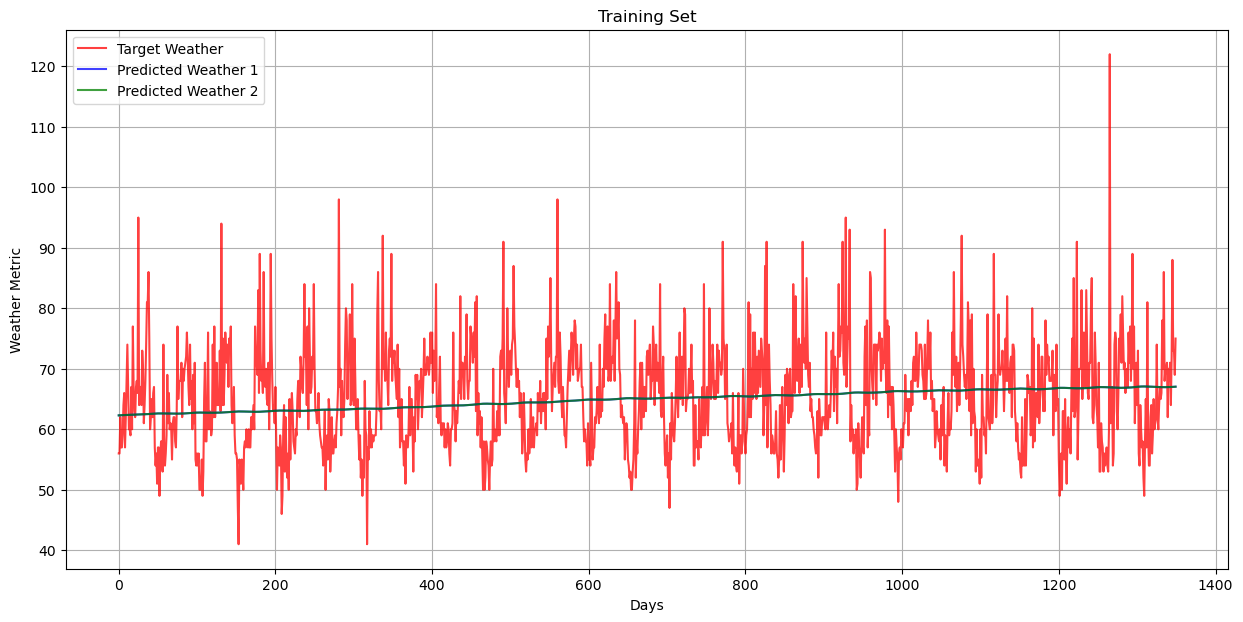

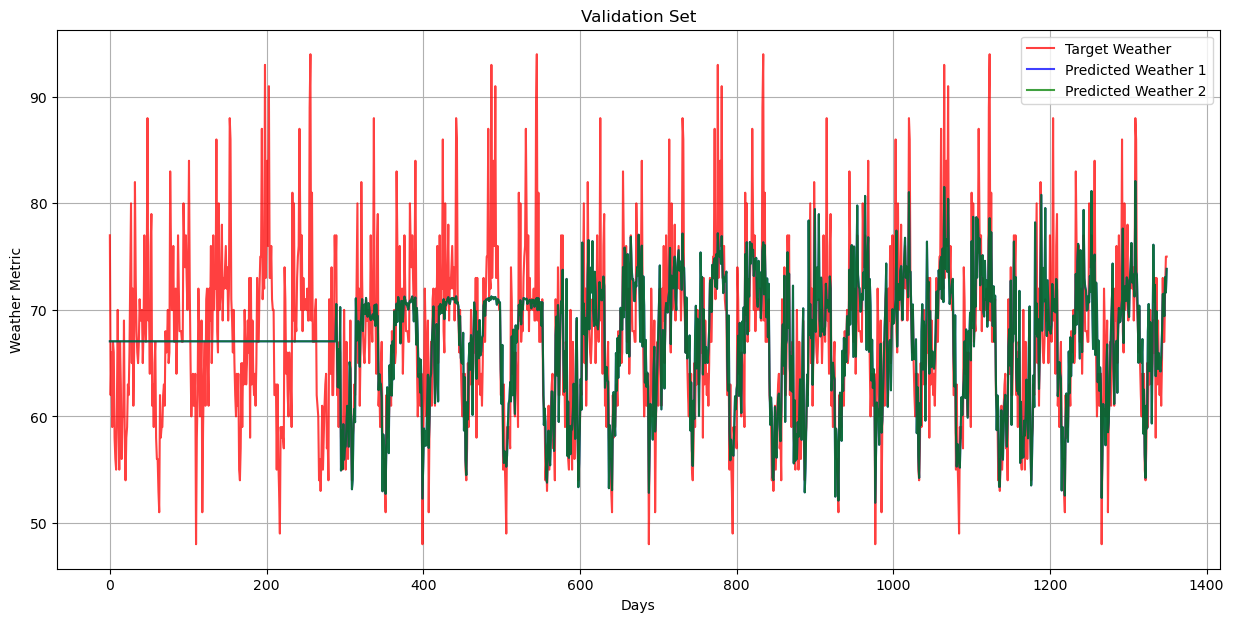

In [1622]:
import matplotlib.pyplot as plt

epoch_to_eval = 3


index_start = 1350 * epoch_to_eval
index_end = (1350 * epoch_to_eval) +1350

plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(training_targets[index_start:index_end,0,6,0], label='Target Weather', linestyle='-', color='red', alpha=0.75)

plt.plot(training_outputs[index_start:index_end,0,6,0], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(training_outputs[index_start:index_end,0,6,0], label='Predicted Weather 2', linestyle='-', color='green', alpha=0.75)

plt.title('Training Set')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()


index_start = 289 * epoch_to_eval
index_end = (289 * epoch_to_eval) +1350


plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(validation_targets[index_start:index_end,0,6,0], label='Target Weather', linestyle='-', color='red', alpha=0.75)

plt.plot(val_outputs[index_start:index_end,0,6,0], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(val_outputs[index_start:index_end,0,6,0], label='Predicted Weather 2', linestyle='-', color='green', alpha=0.75)

plt.title('Validation Set')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()


Version with modify output abilty

In [1440]:
all_outputs = []
neural_rnn = NeuralRNN(input_size=3, hidden_size=64, num_layers=2, output_size=1, dropout=0.0).to(device)
loss_function = torch.nn.MSELoss()  # Mean Squared Error Loss, or choose another appropriate to your task
optimizer = torch.optim.Adam(neural_rnn.parameters(), lr=0.0001)  # Using Adam optimizer

for epoch in range(num_epochs):
    print(f'--- epoch: {epoch +1} ----')

    neural_rnn.train()
    train_loss = 0.0

    batch_counter = 0
    for inputs, targets in train_loader:
        batch_counter += 1
        outputs = neural_rnn(inputs)

     

        # Store all output predictions for every batch
        if modify_output_testing:
               # Change shape of targets for this example
            targets = targets[:,:,:21]
            output_array = outputs.detach().cpu().numpy()
            all_outputs.append(output_array)  # Appending to the list

        # Testing modifying the output tensor
        # Step 1: turn outputs to an array, then scale the middle column of the output tensor, then convert outputs back to a tensor 
            scale_factor = 2
            outputs_scaled = outputs * (scale_factor * torch.ones_like(outputs))
            outputs_scaled_tensor = torch.tensor(outputs_scaled)

        # Compute MSE Loss directly on tensors
            loss = nn.MSELoss()(outputs_scaled_tensor, targets)
        else: 
            loss = loss_function(outputs, targets)

        loss.backward
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)  # Multiply by batch size to undo averaging in loss calculation

    print(f'Batch: {batch_counter}, Training Loss: {train_loss:.3f}')


--- epoch: 1 ----
Batch: 1350, Training Loss: 5854462.956
--- epoch: 2 ----
Batch: 1350, Training Loss: 5854462.956


In [1356]:
all_outputs = np.array(all_outputs)
print(all_outputs.shape)

# Set the epoch, reach, and unit you want to evaluate
epoch_to_eval = 4
reach_to_eval = 119
unit_to_eval = 10
rnn_unit_to_eval(epoch_to_eval,reach_to_eval,unit_to_eval,all_outputs)


(70, 10, 220, 21)
Total shape of all_outputs: (70, 10, 220, 21)
global_batch_index: 67, (67,x,x,x)
reach_index_within_batch: 9, (x,9,x,x)
grabbing all bins: (x,x, :, X)
Rnn unit evaluating: 10, (x,x,x,10)
Selected data shape: (220,)
Rnn unit evaluating: 10



array([ 0.0133853 ,  0.24245971, -0.22427757, -0.36605644, -0.16126722,
       -0.10595195, -0.53376096,  0.25766626, -0.3391061 ,  0.25110236,
       -0.15248957, -0.11416109, -0.26261657, -0.20877765,  0.0063695 ,
       -0.49454   ,  0.07476722, -0.30631036,  0.1965692 ,  0.08650525,
        0.07182272,  0.21467131, -0.16714111,  0.09523089,  0.35045385,
       -0.05018522, -0.12147475, -0.02763525, -0.25653663, -0.6529285 ,
       -0.13169593,  0.11944751, -0.76717895,  0.32775486,  0.18259326,
        0.1596143 , -0.55894506,  0.19423583, -0.16131255, -0.6483608 ,
       -0.214607  , -0.24675982, -0.27585888, -0.24258332,  0.29392204,
       -0.09991685, -0.13723616, -0.09308553,  0.11718303,  0.11476718,
        0.15326646, -0.07338815, -0.47430438, -0.420174  , -0.01590046,
       -0.23719437, -0.09228534, -0.4989485 , -0.18607241, -0.10964815,
       -0.5538055 ,  0.21749684, -0.19970629,  0.1270436 , -0.44797355,
        0.14524558,  0.40316924, -0.04480268, -0.16253397, -0.37

# MY LOOP

In [1315]:

# Initialize the lists to gather all outputs and target embeddings
all_outputs = []
target_embeddings_per_batch_arrays = []
output_embedding_per_batch_arrays = []
for epoch in range(num_epochs):
    neural_rnn.train()
    train_loss = 0.0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        
           # Saving out data from each batch 
        m1_embedding_target = targets.detach().numpy()
        target_embeddings_per_batch_arrays.append(m1_embedding_target)

       # Forward pass through RNN
        outputs = neural_rnn(inputs)
        
        # Collect RNN outputs if necessary (after detaching from the graph)
        output_array = outputs.detach().cpu().numpy()
        all_outputs.append(output_array)

        # Flatten the batch dimension for the output for autoencoder transformation
        output_flat_batch = outputs.view(-1, 21)


        # Transform outputs using the fixed pre-trained model (no gradient tracking needed here)
        with torch.no_grad():
            # output_embedding_per_batch_np = cebra_time_model_m1.transform(output_flat_batch.cpu().numpy())
            output_embedding_per_batch_np = cebra_time_model_m1.transform(output_flat_batch.cpu().numpy())

            output_embedding_per_batch_array = np.array(output_embedding_per_batch_np)

            output_embedding_per_batch_arrays.append(output_embedding_per_batch_array)

            output_embedding_per_batch = torch.tensor(output_embedding_per_batch_np, dtype=torch.float32, device=device)

        # Reshape the outputs from the autoencoder back to match the RNN output shape
        output_embedding_per_batch = output_embedding_per_batch.view(-1, 220, 32)
    
        # Ensure output embeddings require grad if they are to be used in loss computation
        output_embedding_per_batch.requires_grad_(True)

        # Compute MSE Loss directly on tensors
        loss = nn.MSELoss()(output_embedding_per_batch, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        # for name, param in neural_rnn.named_parameters():
        #     if param.grad is not None:
        #         print(f"Gradient for {name}: {param.grad.norm(2)}")
        #     else:
        #         print(f"Gradient for {name} is None")

        train_loss /= len(train_loader.dataset)

    
    neural_rnn.eval()
    val_loss = 0.0        
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            m1_valid_embedding_target = targets.detach().numpy()
            target_valid_embeddings_per_batch_arrays.append(m1_valid_embedding_target)
            
            outputs = neural_rnn(inputs)

                # Flatten the batch dimension for the output for autoencoder transformation
            output_flat_batch = outputs.view(-1, 21)
            # print(f'output_flat_batch: {output_flat_batch.shape}')

                    # Transform outputs using the fixed pre-trained model (no gradient tracking needed here)
            with torch.no_grad():
                output_embedding_per_batch_np = cebra_time_model_m1.transform(output_flat_batch.cpu().numpy())
                # output_embedding_per_batch_array = np.array(output_embedding_per_batch_np)
                # output_embedding_per_batch_arrays.append(output_embedding_per_batch_array)
                output_embedding_per_batch = torch.tensor(output_embedding_per_batch_np, dtype=torch.float32, device=device)
                    # Reshape the outputs from the autoencoder back to match the RNN output shape
            output_embedding_per_batch = output_embedding_per_batch.view(-1, 220, 32)
            # Ensure output embeddings require grad if they are to be used in loss computation
            output_embedding_per_batch.requires_grad_(True)

            # Compute MSE Loss directly on tensors
            loss = nn.MSELoss()(output_embedding_per_batch, targets)
            val_loss += loss.item() * inputs.size(0)
        val_loss /= len(val_loader.dataset)


    # train_loss /= len(train_loader.dataset)

    print(f'Epoch {epoch+1} \tTraining Loss: {train_loss:.4f} \t Valid Loss: {val_loss:.4f} ')

    if train_loss < min_val_loss:
        min_val_loss = train_loss
        stop_counter = 0
    else:
        stop_counter += 1

    if stop_counter >= early_stopping_patience:
        print("Early stopping triggered.")
        break


Epoch 1 	Training Loss: 0.1014 	 Valid Loss: 1.6766 


Epoch 2 	Training Loss: 0.1014 	 Valid Loss: 1.6766 
Epoch 3 	Training Loss: 0.1014 	 Valid Loss: 1.6766 
Epoch 4 	Training Loss: 0.1014 	 Valid Loss: 1.6766 
Epoch 5 	Training Loss: 0.1014 	 Valid Loss: 1.6766 


# CHAT GPT LOOP

In [1294]:
output_embedding_per_batch_arrays = np.array(output_embedding_per_batch_arrays)
print(output_embedding_per_batch_arrays.shape)

batch_number = 67


rnn_embedding_1 = output_embedding_per_batch_arrays[batch_number, 0:220, 0]
rnn_embedding_2 = output_embedding_per_batch_arrays[batch_number, 0:220, 1]
rnn_embedding_3 = output_embedding_per_batch_arrays[batch_number, 0:220, 2]
output_embedding_per_batch_arrays.shape

(70, 2200, 32)


(70, 2200, 32)

In [1299]:
# all_outputs = (batch_number, seq_length, time_bins, units)
# batch_number = Each Epoch produces 14 batchs, so with 5 epochs you get 70 batchs (70, x, x, x),
# seq_length = Pre set value that passes the rnn 10 reachs at a time, since the training set has 140 reachs in it, each epoch needs 14 batchs to run through the full data set 14 * 10 = 140, (x, 10, x, x)
# time_bins = Pre set value that breaks up the full dataset into groups of 220 coresponding to each each (x, x, 220, x)
# units = for every batch the rnn prodces firing rate predictions for 21 units, to match how mamny real m1 units i got. (x, x, x, 21)
# HOW TO INDEX INTO all_units: 
###### every epoch makes a prediction for all 140 reachs. so to select which epoch you want 

# Set the epoch, reach, and unit you want to evaluate
epoch_to_eval = 3
reach_to_eval = 119
unit_to_eval = 5

all_outputs = np.array(all_outputs)
def rnn_unit_to_eval(epoch_to_eval,reach_to_eval,unit_to_eval,output_to_eval=all_outputs):
    # Compute indices
    batch_index = reach_to_eval // 10  # 10 reaches per batch
    reach_index_within_batch = reach_to_eval % 10
    global_batch_index = epoch_to_eval * 14 + batch_index

    print("Total shape of all_outputs:", all_outputs.shape)
    print(f'global_batch_index: {global_batch_index}, ({global_batch_index},x,x,x)')
    print(f'reach_index_within_batch: {reach_index_within_batch}, (x,{reach_index_within_batch},x,x)')
    print('grabbing all bins: (x,x, :, X)')
    print(f'Rnn unit evaluating: {unit_to_eval}, (x,x,x,{unit_to_eval})')


    # Index into all_outputs
    selected_data = output_to_eval[global_batch_index, reach_index_within_batch, :, unit_to_eval]

    # Show the shape of the selected data and the total shape of all_outputs
    print("Selected data shape:", selected_data.shape)
    print(f'Rnn unit evaluating: {unit_to_eval}')
    print('')
    return selected_data

rnn_unit_to_eval(epoch_to_eval,reach_to_eval,unit_to_eval)


Total shape of all_outputs: (28, 10, 220, 21)
global_batch_index: 53, (53,x,x,x)
reach_index_within_batch: 9, (x,9,x,x)
grabbing all bins: (x,x, :, X)
Rnn unit evaluating: 5, (x,x,x,5)


IndexError: index 53 is out of bounds for axis 0 with size 28

In [1257]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.ndimage import gaussian_filter1d

def view_units(unit_to_view_mthal, second_unit_to_view_mthal, third_unit_to_view_mthal,rnn_unit_1, rnn_unit_2, rnn_unit_3, reaches_to_view):
    plt.close('all')  # Close any previous plots

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 18))

    # Define subplots for Mthal firing rates (first row)
    ax1 = fig.add_subplot(5, 3, 1)
    ax2 = fig.add_subplot(5, 3, 2)
    ax3 = fig.add_subplot(5, 3, 3)

    # Define subplots for M1 firing rates (second row)
    ax4 = fig.add_subplot(5, 3, 4)
    ax5 = fig.add_subplot(5, 3, 5)
    ax6 = fig.add_subplot(5, 3, 6)

    # Define subplots for Mthal embeddings (third row)
    ax7 = fig.add_subplot(5, 3, 7)
    ax8 = fig.add_subplot(5, 3, 8)
    ax9 = fig.add_subplot(5, 3, 9)

    # Define subplots for M1 embeddings (fourth row)
    ax10 = fig.add_subplot(5, 3, 10)
    ax11 = fig.add_subplot(5, 3, 11)
    ax12 = fig.add_subplot(5, 3, 12)

    # Define subplots for 3D embeddings (fifth row)
    ax13 = fig.add_subplot(5, 3, 13, projection='3d')
    ax14 = fig.add_subplot(5, 3, 14, projection='3d')

    # Function to smooth data
    def smooth_data(data, sigma=2):
        return gaussian_filter1d(data, sigma=sigma)

    # Colors for different reaches
    colors = plt.cm.viridis(np.linspace(0, 1, len(reaches_to_view)))

    s = 0
    # Iterate over reaches to view and plot the data
    for i, reach in enumerate(reaches_to_view):
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch mthal firing rates for the specified reach
        # unit_frs = data_mthal_neuralData[unit_to_view_mthal].to_numpy()[reach_start:reach_end]
        # second_unit_frs = data_mthal_neuralData[second_unit_to_view_mthal].to_numpy()[reach_start:reach_end]
        # third_unit_frs = data_mthal_neuralData[third_unit_to_view_mthal].to_numpy()[reach_start:reach_end]

        # Fetch Rnn firing rates for the specified reach

        # (epoch, reach_number, UNIT)
        rnn_unit_1 = rnn_unit_to_eval(4,i,unit1_compare)
        rnn_unit_2 = rnn_unit_to_eval(4,i,unit2_compare)
        rnn_unit_3 = rnn_unit_to_eval(4,i,unit3_compare)

        unit_frs = rnn_unit_1
        print(unit_frs)
        second_unit_frs = rnn_unit_2
        third_unit_frs = rnn_unit_3

        # Fetch M1 firing rates for the specified reach
        first_unit_frs_m1 = data_m1_neuralData[unit_to_view_m1].to_numpy()[reach_start:reach_end]
        print(first_unit_frs_m1)
        second_unit_frs_m1 = data_m1_neuralData[second_unit_to_view_m1].to_numpy()[reach_start:reach_end]
        third_unit_frs_m1 = data_m1_neuralData[third_unit_to_view_m1].to_numpy()[reach_start:reach_end]

        # # Fetch Mthal embeddings for the specified reach
        # unit_embedding = data_mthal_embedding[0].to_numpy()[reach_start:reach_end]
        # second_unit_embedding = data_mthal_embedding[1].to_numpy()[reach_start:reach_end]
        # third_unit_embedding = data_mthal_embedding[2].to_numpy()[reach_start:reach_end]

    
        reach_S = s * 220
        reach_E = s * 440

        rnn_embedding_1 = output_embedding_per_batch_arrays[batch_number, reach_S:reach_E, 0]
        rnn_embedding_2 = output_embedding_per_batch_arrays[batch_number, reach_S:reach_E, 1]
        rnn_embedding_3 = output_embedding_per_batch_arrays[batch_number, reach_S:reach_E, 2]
        s += 1
        # Fetch M1 embeddings for the specified reach
        embedding_1_m1 = data_m1_embedding[3].to_numpy()[reach_start:reach_end]
        embedding_2_m1 = data_m1_embedding[4].to_numpy()[reach_start:reach_end]
        embedding_3_m1 = data_m1_embedding[5].to_numpy()[reach_start:reach_end]

        # Plot smoothed Mthal firing rates
        ax1.plot(smooth_data(unit_frs), label=f'Reach {reach}', color=colors[i])
        ax2.plot(smooth_data(second_unit_frs), label=f'Reach {reach}', color=colors[i])
        ax3.plot(smooth_data(third_unit_frs), label=f'Reach {reach}', color=colors[i])

        # Plot smoothed M1 firing rates
        ax4.plot(smooth_data(first_unit_frs_m1), label=f'Reach {reach}', color=colors[i])
        ax5.plot(smooth_data(second_unit_frs_m1), label=f'Reach {reach}', color=colors[i])
        ax6.plot(smooth_data(third_unit_frs_m1), label=f'Reach {reach}', color=colors[i])

        # Plot Mthal embeddings
        ax7.plot(rnn_embedding_1, label=f'Reach {reach}', color=colors[i])
        ax8.plot(rnn_embedding_2, label=f'Reach {reach}', color=colors[i])
        ax9.plot(rnn_embedding_3, label=f'Reach {reach}', color=colors[i])

        # Plot M1 embeddings
        ax10.plot(embedding_1_m1, label=f'Reach {reach}', color=colors[i])
        ax11.plot(embedding_2_m1, label=f'Reach {reach}', color=colors[i])
        ax12.plot(embedding_3_m1, label=f'Reach {reach}', color=colors[i])

        # Plot 3D embeddings for Mthal and M1
        ax13.plot(rnn_embedding_1, rnn_embedding_2, rnn_embedding_3, color=colors[i], label=f'Reach {reach}')
        ax14.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, color=colors[i], label=f'Reach {reach}')

    # Set titles for the plots
    ax1.set_title(f"rnn Unit {unit_to_view_mthal} Firing Rate")
    ax2.set_title(f"rnn Unit {second_unit_to_view_mthal} Firing Rate")
    ax3.set_title(f"rnn Unit {third_unit_to_view_mthal} Firing Rate")

    ax4.set_title(f"M1 Unit {unit_to_view_m1} Firing Rate")
    ax5.set_title(f"M1 Unit {second_unit_to_view_m1} Firing Rate")
    ax6.set_title(f"M1 Unit {third_unit_to_view_m1} Firing Rate")

    ax7.set_title("Rnn First Embedding")
    ax8.set_title("Rnn Second Embedding")
    ax9.set_title("Rnn Third Embedding")

    ax10.set_title("M1 First Embedding")
    ax11.set_title("M1 Second Embedding")
    ax12.set_title("M1 Third Embedding")

    ax13.set_title("Mthal 3D Embedding")
    ax14.set_title("M1 3D Embedding")

    # Enhance layout and display the plot
    fig.tight_layout(pad=3.0)
    plt.show()




Total shape of all_outputs: (70, 10, 220, 21)
reach_index_within_batch: 0
global_batch_index: 56
Selected data shape: (220,)
Rnn unit evaluating: 1

Total shape of all_outputs: (70, 10, 220, 21)
reach_index_within_batch: 0
global_batch_index: 56
Selected data shape: (220,)
Rnn unit evaluating: 4

Total shape of all_outputs: (70, 10, 220, 21)
reach_index_within_batch: 0
global_batch_index: 56
Selected data shape: (220,)
Rnn unit evaluating: 8

[0.12699585 0.13743985 0.14175448 0.13177304 0.12634355 0.13167793
 0.15172789 0.14792094 0.18043542 0.18889514 0.1812766  0.17099498
 0.168604   0.10254554 0.12546405 0.09417272 0.09616943 0.07753921
 0.08763207 0.12869279 0.21473388 0.17039117 0.13090207 0.15776302
 0.15192617 0.1313128  0.1225597  0.13621786 0.11780268 0.15207426
 0.13385957 0.15987983 0.16945875 0.17881823 0.16939786 0.17465335
 0.15821047 0.18665898 0.13189137 0.11218379 0.12167348 0.134702
 0.08029425 0.04410497 0.04558937 0.11066176 0.1089775  0.14214443
 0.10993346 0.12648

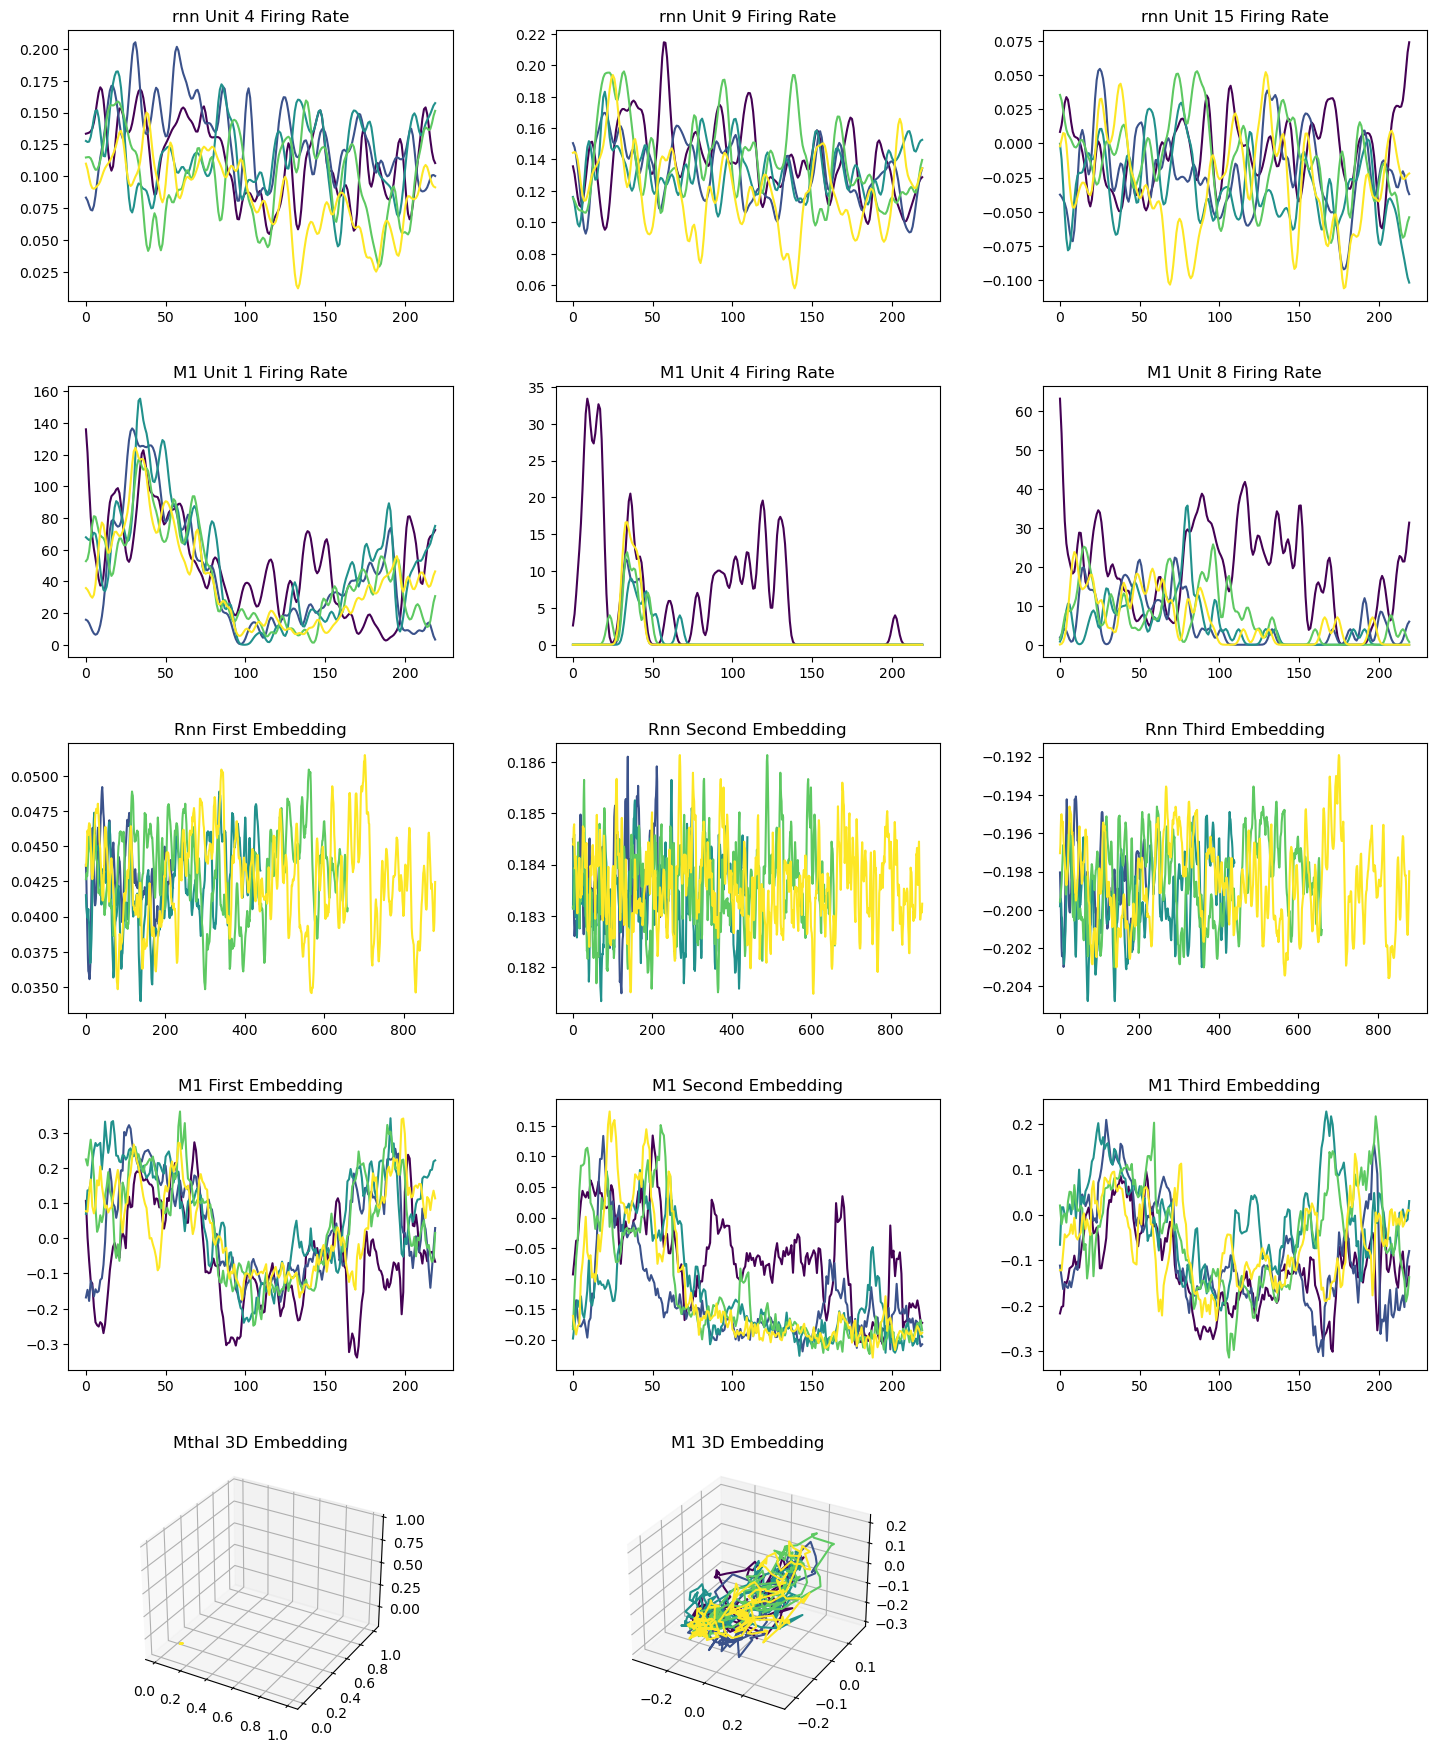

In [1262]:
unit1_compare = 1
unit2_compare = 4
unit3_compare = 8

# # (epoch, reach_number, UNIT)
# rnn_unit_1 = rnn_unit_to_eval(4,119,unit1_compare)
# rnn_unit_2 = rnn_unit_to_eval(4,119,unit2_compare)
# rnn_unit_3 = rnn_unit_to_eval(4,119,unit3_compare)

unit_to_view_m1 = unit1_compare
second_unit_to_view_m1 = unit2_compare
third_unit_to_view_m1 = unit3_compare

reaches_to_view = range(100,105 )  # Range of reaches to display
view_units(unit_to_view_mthal, second_unit_to_view_mthal, third_unit_to_view_mthal,rnn_unit_1, rnn_unit_2, rnn_unit_3,reaches_to_view)

In [497]:
print(type(output_embedding_per_batch_arrays))
print(len(output_embedding_per_batch_arrays))
print(output_embedding_per_batch_arrays[300].shape)
print(output_embedding_per_batch_arrays[300][:,0])

print(type(target_embeddings_per_batch_arrays))
print(len(target_embeddings_per_batch_arrays))
print(target_embeddings_per_batch_arrays[300].shape)
print(target_embeddings_per_batch_arrays[300][0,:,0].shape)
# print(target_embeddings_per_batch_arrays[300][:,0])

print(type(target_valid_embeddings_per_batch_arrays))
print(len(target_valid_embeddings_per_batch_arrays))
print(target_valid_embeddings_per_batch_arrays[0].shape)
print(target_valid_embeddings_per_batch_arrays[0][0,:,0].shape)

<class 'list'>
480
(3520, 32)
[-0.00403821 -0.00477755 -0.00954976 ... -0.01017859 -0.00956626
 -0.01217021]
<class 'list'>
384
(16, 220, 32)
(220,)
<class 'list'>
96
(16, 220, 32)
(220,)


(220,)


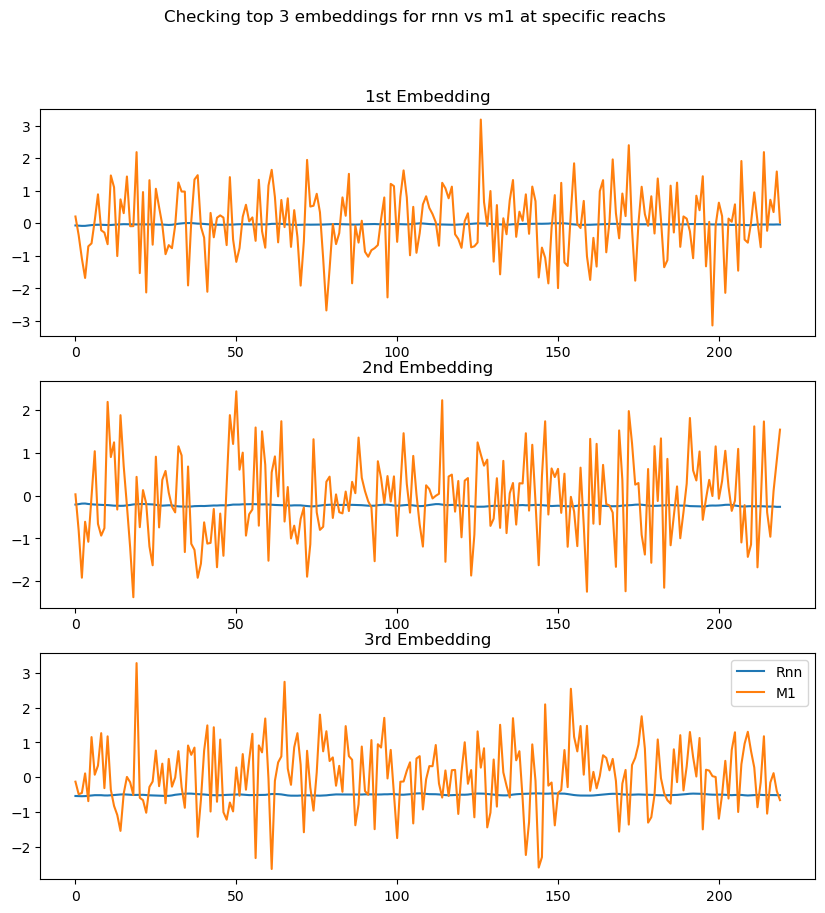

In [493]:

reach_start = 1
reach_end = 2
batch_to_comapre = 0

plt.close('all')
# Create a new figure with a specific size
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(311)  # Third row, first column
ax2 = fig.add_subplot(312)  # Third row, second column
ax3 = fig.add_subplot(313)  # Third row, third column
print(m1_embedding_target[0,:,0].shape)
# Third row
embedding_1_m1 = target_embeddings_per_batch_arrays[300][batch_to_comapre,:,0]
embedding_2_m1 = target_embeddings_per_batch_arrays[300][batch_to_comapre,:,1]
embedding_3_m1 = target_embeddings_per_batch_arrays[300][batch_to_comapre,:,2]
embedding_1_pred = output_embedding_per_batch_arrays[300][0:220,0]
embedding_2_pred = output_embedding_per_batch_arrays[300][0:220,1]
embedding_3_pred = output_embedding_per_batch_arrays[300][0:220,2]

ax1.plot(embedding_1_pred, label=f'Rnn')
ax1.plot(embedding_1_m1, label=f'M1')
ax2.plot(embedding_2_pred, label=f'Rnn')
ax2.plot(embedding_2_m1, label=f'M1')
ax3.plot(embedding_3_pred,  label=f'Rnn')
ax3.plot(embedding_3_m1, label=f'M1')

    # Setting titles for subplots, second unit
plt.legend()

ax1.set_title("1st Embedding")
ax2.set_title("2nd Embedding")
ax3.set_title("3rd Embedding")

# Overall title for the figure
fig.suptitle(f'Checking top 3 embeddings for rnn vs m1 at specific reachs')
# Show the plot
plt.show()


In [323]:
from datetime import datetime

num_epochs = 43 # HOW MANY EPOCHS DID IT RUN BEFORE IT AUTO STOPPED 

# Get the current date and time formatted as a string (e.g., "2023-03-28_15-30-45")
current_datetime = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

rnn_save_path = f'rnn_models/rnn_model_{num_epochs}_{mouse}_{current_datetime}.pth'
# Saving the model
torch.save(neural_rnn.state_dict(), rnn_save_path)


In [324]:

# Parameters must match those of the model you're loading
input_size = 32
hidden_size = 64
num_layers = 2  # This needs to match the saved model
output_size = 32  # This needs to match the saved model
dropout = 0.1

num_epochs = 100  # Update this based on your actual training epochs before early stopping

# Use the same parameters as the original model
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)

# Loading the model
# Loading the model with the same architecture
neural_rnn_loaded = NeuralRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size, dropout=dropout).to(device)
neural_rnn_loaded.load_state_dict(torch.load(rnn_save_path))
neural_rnn_loaded.eval()  # Set it to evaluation mode if only doing inference

# If you want to continue training, switch back to train mode
neural_rnn_loaded.train()

NeuralRNN(
  (lstm): LSTM(32, 64, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=64, out_features=32, bias=True)
)

In [325]:

# Example of reshaping
epoch_predictions = all_train_predictions_array[-1]  # This has shape (194, 220, 20)
epoch_valid_prediction = all_val_predictions_array[-1]

flattened_predictions = epoch_predictions.reshape(-1, epoch_predictions.shape[2])
flattened_valid_predictions = epoch_valid_prediction.reshape(-1, epoch_valid_prediction.shape[2])

# Now, flattened_predictions has shape (194 * 220, 20), which should be (42680, 20)
print("Flattened predictions shape:", flattened_predictions.shape)
print("Flattened valid predictions shape:", flattened_valid_predictions.shape)


Flattened predictions shape: (42680, 32)
Flattened valid predictions shape: (9020, 32)


In [326]:
discete_lables.shape, output_predictions_flat.shape
train_lables_discrete = discete_lables[0:42680]
train_lables_discrete.shape


vaild_target_tensor = valid_target_tensor.detach().numpy()


train_target_tensor = train_target_tensor
train_target_tensor = train_target_tensor[0:42680]


In [327]:
# split the discete_lables 
train_labels = discete_lables[:train_size]
valid_labels_reshapped_for_rnn_prediction = valid_labels[0:flattened_valid_predictions.shape[0],:]
valid_labels_reshapped_for_target = valid_labels[0:vaild_target_tensor.shape[0],:]


Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

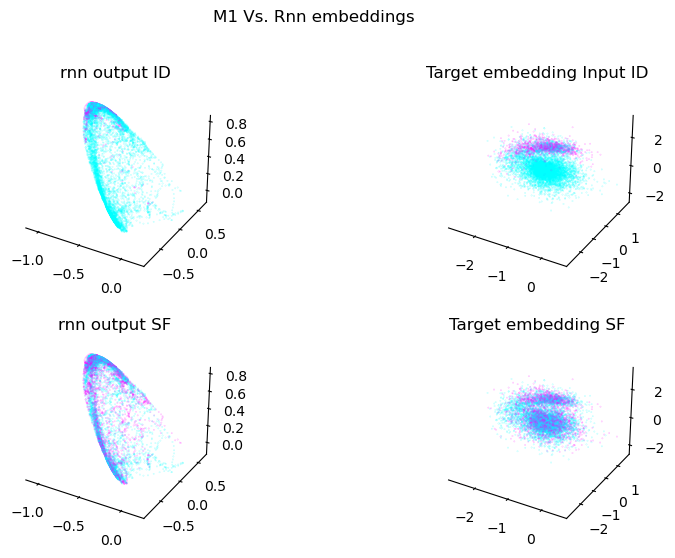

In [328]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)
index_order = (3,4,5)



#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=flattened_valid_predictions, embedding_labels=valid_labels_reshapped_for_rnn_prediction[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=vaild_target_tensor, embedding_labels=valid_labels_reshapped_for_target[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=flattened_valid_predictions, embedding_labels=valid_labels_reshapped_for_rnn_prediction[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=vaild_target_tensor, embedding_labels=valid_labels_reshapped_for_target[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

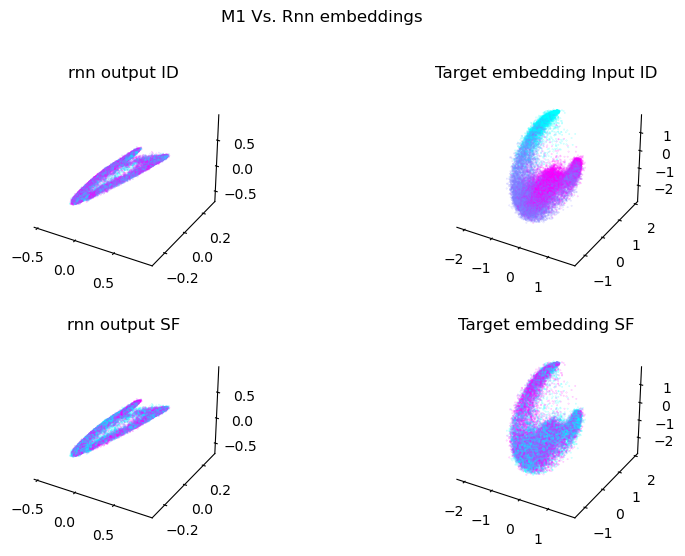

In [330]:
plt.figure(figsize=(10, 6))

index_order = (0,1,2)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_order,embedding=flattened_predictions, embedding_labels=train_lables_discrete[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,0], title='Target embedding Input ID')
ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_order,embedding=flattened_predictions, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

### 4. Test rnn on unseen data

create dataloader for unseen test data (data witheld from both training and validation)

In [1623]:
class FullSequenceDataset(Dataset):
    def __init__(self, features, labels):
        # Ensure data is in the correct shape [1, seq_length, feature_size]
        self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
        self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension

    def __len__(self):
        return 1  # We have only one batch in this dataset

    def __getitem__(self, index):
        # Return the whole sequence
        return self.features[index], self.labels[index]

test_dataset = FullSequenceDataset(test_input_tensor, test_target_tensor)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)  # No need to shuffle, only one batch



C:\Users\user\AppData\Local\Temp\ipykernel_17324\1057171156.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
C:\Users\user\AppData\Local\Temp\ipykernel_17324\1057171156.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(0)      # Add batch dimension


In [1624]:
test_input_tensor.shape, test_target_tensor.shape

(torch.Size([2027, 3]), torch.Size([2027, 1]))

In [1625]:
for inputs, targets in test_loader:
    print("Inputs shape:", inputs.shape)  # Expected: torch.Size([1, 9174, 32])
    print("Targets shape:", targets.shape)  # Expected: torch.Size([1, 9174, 20])

    # Additionally, check individual timestep data if needed:
    print("Single input timestep shape:", inputs[0][1].shape)  # Should print the shape of the feature vector: torch.Size([32])
    print("Single input timestep data:", inputs[0][1])  # Data of the features at timestep 2
    print("Single target timestep shape:", targets[0][1].shape)  # Should print the shape of the target vector: torch.Size([20])
    print("Single target timestep data:", targets[0][1])  # Data of the targets at timestep 2
    break  # Since all data is in one batch, no need to loop further


Inputs shape: torch.Size([1, 2027, 3])
Targets shape: torch.Size([1, 2027, 1])
Single input timestep shape: torch.Size([3])
Single input timestep data: tensor([ 0.2333,  0.5258, -0.2537])
Single target timestep shape: torch.Size([1])
Single target timestep data: tensor([67.])


Run a single pass of the already trained rnn on this unseen data
- makes prediction on unseen data (does not update the rnn in anyway)

Overall Mean Squared Error Loss: 22.828166961669922
MSE for embedding 0: 22.828166961669922


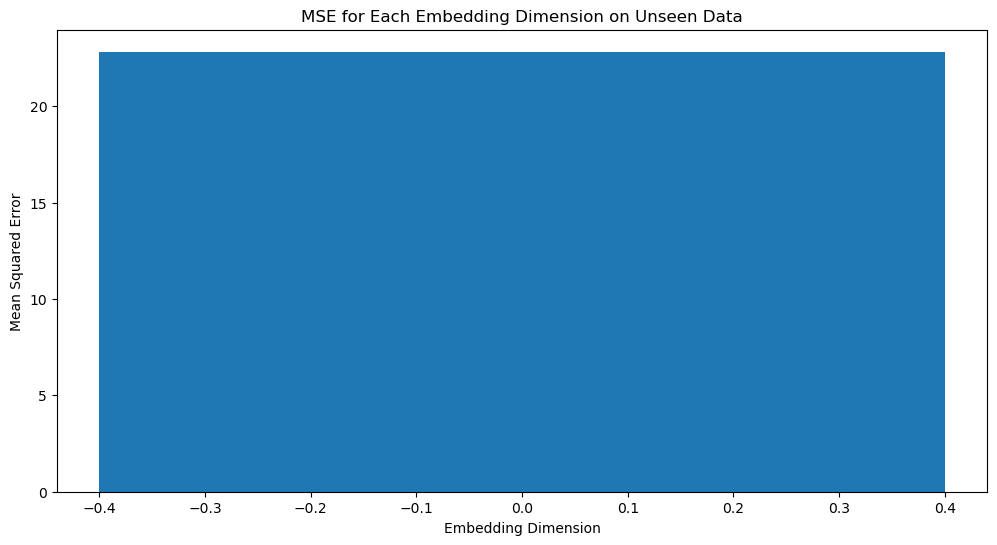

In [1638]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

# Assuming neural_rnn_loaded is already loaded and set to evaluation mode
neural_rnn.eval()
test_outputs = []
test_targets = []

# Directly access the full sequence since you know you have one full batch
inputs, targets = next(iter(test_loader))
inputs, targets = inputs.to(device), targets.to(device)

with torch.no_grad():
    outputs = neural_rnn(inputs)
    test_outputs.append(outputs.detach().numpy())
    test_targets.append(targets.detach().numpy())
    mse_loss = nn.MSELoss()
    loss = mse_loss(outputs, targets)
    print("Overall Mean Squared Error Loss:", loss.item())

# Calculate MSE for each embedding dimension
mse_per_embedding = []
for i in range(outputs.shape[2]):  # Loop across the embedding dimension
    mse = mse_loss(outputs[0, :, i], targets[0, :, i]).item()
    mse_per_embedding.append(mse)
    print(f"MSE for embedding {i}: {mse}")

# Visualize the MSE across all embeddings
plt.figure(figsize=(12, 6))
plt.bar(range(len(mse_per_embedding)), mse_per_embedding)
plt.xlabel('Embedding Dimension')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Each Embedding Dimension on Unseen Data')
plt.show()


In [1643]:
test_outputs = np.array(test_outputs)
test_targets = np.array(test_targets)
test_outputs.shape, test_targets.shape


((1, 1, 2027, 1), (1, 1, 2027, 1))

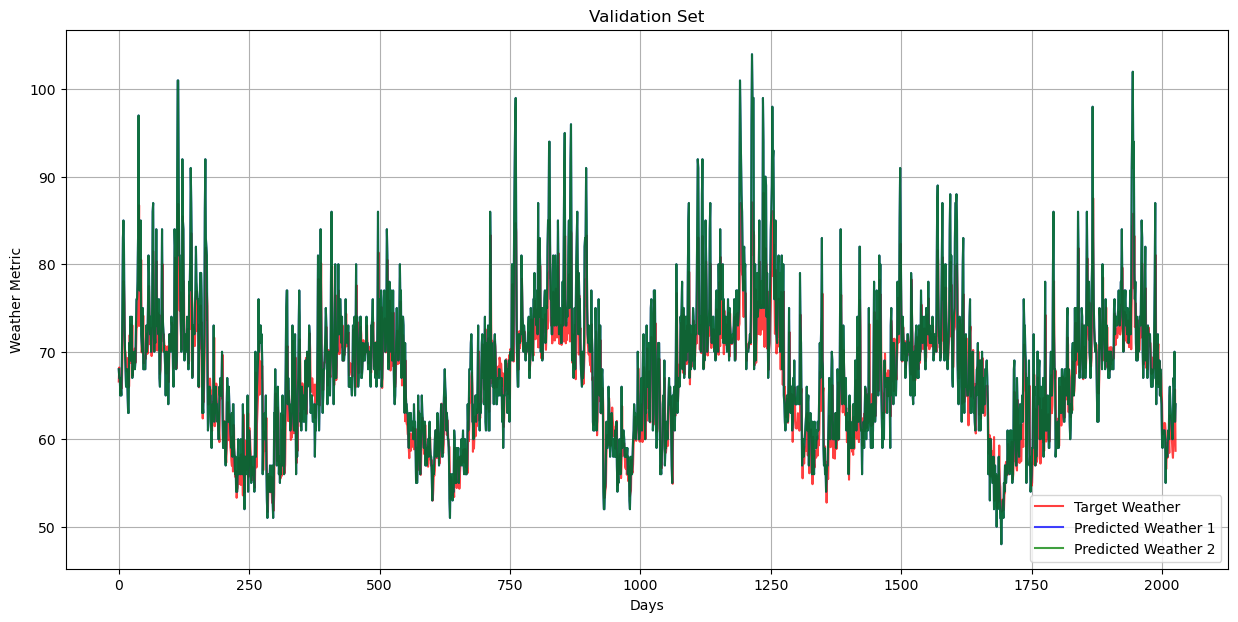

In [1644]:
import matplotlib.pyplot as plt

epoch_to_eval = 1


index_start = 289 * epoch_to_eval
index_end = (289 * epoch_to_eval) +1350


plt.figure(figsize=(15, 7))
# plt.plot(targets, label='Actual Weather', color='blue', alpha=0.75)
plt.plot(test_outputs[0,0,:,0], label='Target Weather', linestyle='-', color='red', alpha=0.75)

plt.plot(test_targets[0,0,:,0], label='Predicted Weather 1', linestyle='-', color='blue', alpha=0.75)
plt.plot(test_targets[0,0,:,0], label='Predicted Weather 2', linestyle='-', color='green', alpha=0.75)

plt.title('Validation Set')
plt.xlabel('Days')
plt.ylabel('Weather Metric')
plt.legend()
plt.grid(True)
plt.show()

Working Eval loop

In [335]:
# neural_rnn.eval()  # Set the model to evaluation mode
# test_predictions = []

# with torch.no_grad():  # No gradients needed for evaluation, which saves memory and computations
#     for inputs, targets in test_loader:
#         print(inputs.shape)
#         print(targets.shape)
#         outputs = neural_rnn(inputs)  # Generate predictions
#         print(outputs.shape)
#         # Initialize the MSE loss function
#         mse_loss = nn.MSELoss()
#         # Calculate the MSE
#         loss = mse_loss(outputs, targets)
#         # Print the MSE loss
#         print("Overall Mean Squared Error Loss:", loss.item())
#         # Assuming the last dimension of your tensors is the embedding dimension (32 embeddings)
#         num_embeddings = outputs.shape[-1]

#         # Loop through each embedding dimension and calculate MSE
#         mse_per_embedding = []
#         for i in range(num_embeddings):
#             # Select the data for the current embedding across all time bins
#             output_emb = outputs[:, :, i]
#             target_emb = targets[:, :, i]

#             # Calculate the MSE for the current embedding
#             loss = mse_loss(output_emb, target_emb)
#             mse_per_embedding.append(loss.item())

#             # Optionally, print the MSE for each embedding
#             print(f"MSE for embedding {i}: {loss.item()}")

#         # If needed, convert the list to a tensor for further analysis or operations
#         mse_per_embedding_tensor = torch.tensor(mse_per_embedding)
        
# outputs

In [336]:
outputs= outputs.detach().numpy()
rnn_predictions = outputs
rnn_predictions.shape

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [337]:
# from sklearn.metrics import mean_squared_error

# # Flatten the predictions and targets to compute the overall MSE
# mse = mean_squared_error(outputs.view(-1).cpu().numpy(), test_predictions.view(-1).cpu().numpy())
# print("Test Mean Squared Error:", mse)


In [338]:
test_y.shape

(9174, 32)

In [339]:
rnn_predictions_embedding_3d  = rnn_predictions[0, :, :]
test_target_embedding_3d  = test_y[:, :]
rnn_predictions.shape, test_target_embedding_3d.shape

((1, 9174, 32), (9174, 32))

In [340]:
label_test_split = discete_lables[51986:]
label_test_split.shape

(9174, 2)

Text(0.5, 0.98, 'M1 Vs. Rnn embeddings')

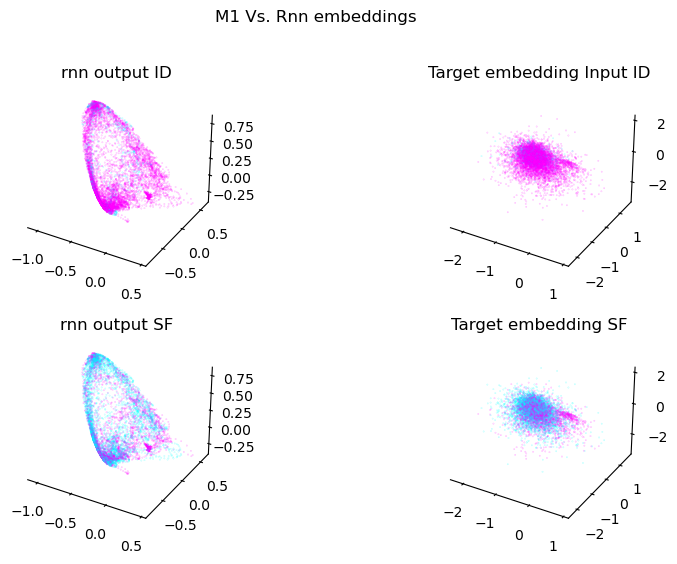

In [343]:
plt.figure(figsize=(10, 6))

index_orde_rnn = (0,1,2)
index_orde_rnn = (3,4,5)


#  Creating each subplot in the 5x2 grid
ax1 = plt.subplot(221, projection='3d')  # First row, first column
ax2 = plt.subplot(222, projection='3d')  # First row, second column
ax3 = plt.subplot(223, projection='3d')  # First row, second column
ax4 = plt.subplot(224, projection='3d')  # First row, second column
# ax5 = plt.subplot(225, projection='3d')  # First row, second column
# ax6 = plt.subplot(226, projection='3d')  # First row, second column

ax1 = cebra.plot_embedding(ax=ax1,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,0], title='rnn output ID')
ax2 = cebra.plot_embedding(ax=ax2,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,0], title='Target embedding Input ID')

ax3 = cebra.plot_embedding(ax=ax3,idx_order=index_orde_rnn,embedding=rnn_predictions_embedding_3d, embedding_labels=label_test_split[:,1], title='rnn output SF')
ax4 = cebra.plot_embedding(ax=ax4,idx_order=index_order_test_y,embedding=test_target_embedding_3d, embedding_labels=label_test_split[:,1], title='Target embedding SF')
# ax5 = cebra.plot_embedding(ax=ax5,idx_order=index_order,embedding=output_predictions_flat, embedding_labels=train_lables_discrete[:,1], title='rnn output SF')
# ax6 = cebra.plot_embedding(ax=ax6,idx_order=index_order,embedding=train_target_tensor, embedding_labels=train_lables_discrete[:,1], title='Target embedding SF')
# add title
plt.suptitle('M1 Vs. Rnn embeddings')

In [349]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view):

    # Close any previous plots
    plt.close('all')

    # Create a new figure with a specific size
    fig = plt.figure(figsize=(15, 14))

    # First row
    ax1 = fig.add_subplot(431)  # First row, first column
    ax2 = fig.add_subplot(432)  # First row, second column
    ax3 = fig.add_subplot(433)  # First row, third column

    # Second row
    ax4 = fig.add_subplot(434)  # Second row, first column
    ax5 = fig.add_subplot(435)  # Second row, second column
    ax6 = fig.add_subplot(436)  # Second row, third column

    # Third row
    ax7 = fig.add_subplot(437)  # Third row, first column
    ax8 = fig.add_subplot(438)  # Third row, second column
    ax9 = fig.add_subplot(439)  # Third row, third column

    # Fourth row
    ax10 = fig.add_subplot(4, 3, 10,projection='3d')  # Fourth row, first column
    ax11 = fig.add_subplot(4, 3, 11,projection='3d')  # Fourth row, second column
    ax12 = fig.add_subplot(4, 3, 12, projection='3d')  # Fourth row, third column

 
    # Assuming data_mthal_neuralData_T and data_mthal_embedding_T are correctly set up
    for reach in reaches_to_view:
        # Calculate the start and end indices for each reach
        reach_start = reach * 220
        reach_end = reach_start + 220

        # Fetch data for the specified reach
        unit_frs = data_mthal_neuralData[unit_to_view].to_numpy()[reach_start:reach_end]
        second_unit_frs = data_mthal_neuralData[second_unit_to_view].to_numpy()[reach_start:reach_end]
        third_unit_frs = data_mthal_neuralData[third_unit_to_view].to_numpy()[reach_start:reach_end]

        embedding_1_rnn =  rnn_predictions[0, :, 3][reach_start:reach_end]
        embedding_2_rnn =  rnn_predictions[0, :, 1][reach_start:reach_end]
        embedding_3_rnn =  rnn_predictions[0, :, 2][reach_start:reach_end]

        # embedding_1_m1 = test_targets[0, :, 0].detach().numpy()[reach_start:reach_end]
        # embedding_2_m1 = test_targets[0, :, 1].detach().numpy()[reach_start:reach_end]
        # embedding_3_m1 = test_targets[0, :, 2].detach().numpy()[reach_start:reach_end]

        
        embedding_1_m1 = test_y[:,3][reach_start:reach_end]
        embedding_2_m1 = test_y[:,1][reach_start:reach_end]
        embedding_3_m1 = test_y[:,2][reach_start:reach_end]

        # Plotting data for the specified reach, first unit
        ax1.plot(unit_frs, label=f'Reach {reach}')
        ax2.plot(second_unit_frs, label=f'Reach {reach}')
        ax3.plot(third_unit_frs, label=f'Reach {reach}')

        # Plotting data for the specified reach, second unit
        ax4.plot(embedding_1_rnn, label=f'Reach {reach}')
        ax5.plot(embedding_2_rnn, label=f'Reach {reach}')
        ax6.plot(embedding_3_rnn,  label=f'Reach {reach}')

        
        # Plotting data for the specified reach, second unit
        ax7.plot(embedding_1_m1, label=f'Reach {reach}')
        ax8.plot(embedding_2_m1, label=f'Reach {reach}')
        ax9.plot(embedding_3_m1,  label=f'Reach {reach}')

        ax10.plot(embedding_1_rnn, embedding_2_rnn, embedding_3_rnn, label=f'Reach {reach}')
        ax11.plot(embedding_1_m1, embedding_2_m1, embedding_3_m1, label=f'Reach {reach}')



    # Adding legends to each subplot
    # for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    #     ax.legend()
    # Setting titles for subplots, first unit
    ax1.set_title(f"Mtahl Unit {unit_to_view} Firing Rate")
    ax2.set_title(f"Mtahl Unit {second_unit_to_view} Firing Rate")
    ax3.set_title(f"Mtahl Unit {third_unit_to_view} Firing Rate")

    # Setting titles for subplots, second unit
    ax4.set_title("Rnn Prediction 1st Embedding")
    ax5.set_title("Rnn Prediction 2nd Embedding")
    ax6.set_title("Rnn Prediction 3rd Embedding")

    ax7.set_title("M1 1st Embedding")
    ax8.set_title("M1 2nd Embedding")
    ax9.set_title("M1 3rd Embedding")

    ax10.set_title("Rnn 3D Embedding")
    ax11.set_title("M1 3D Embedding")


    # Overall title for the figure
    fig.suptitle(f'Checking top 3 embeddings for M1 and Mthal at spefici reachs')

    # Show the plot
    plt.show()

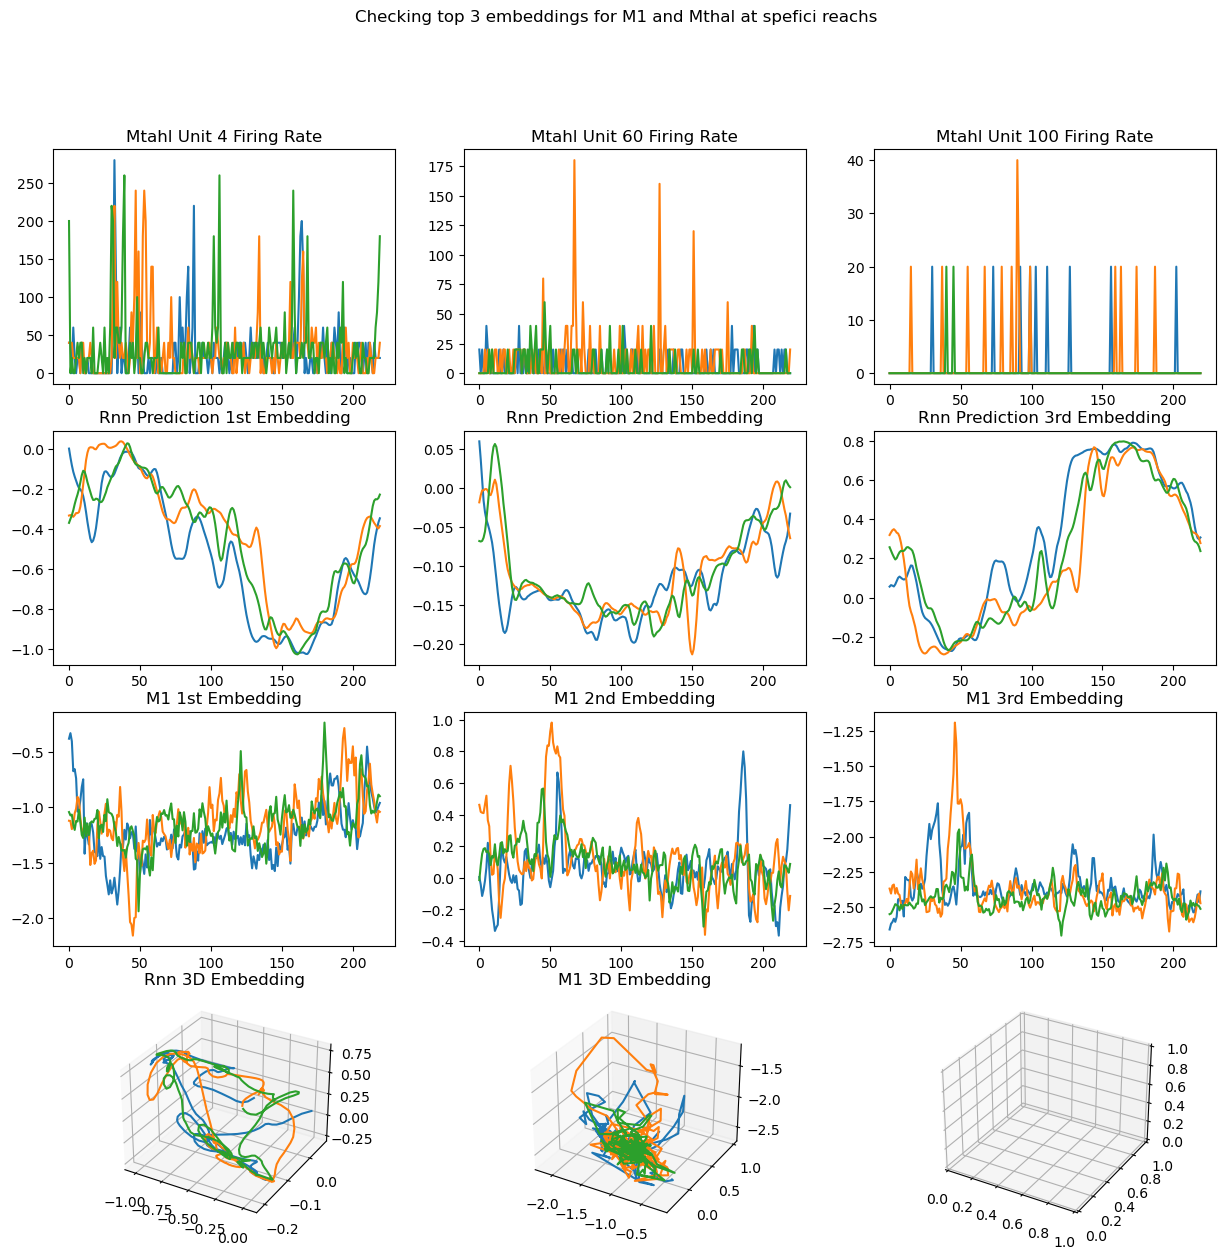

In [351]:
# Units to view
unit_to_view = 4
second_unit_to_view = 60  # Second unit to display
third_unit_to_view = 100
reaches_to_view = range(0, 3)  # Range of reaches to display

view_rnn_predictions(unit_to_view,second_unit_to_view,third_unit_to_view,reaches_to_view)

In [221]:
rnn_predictions.shape,rnn_predictions[0, :, 0].shape, test_y.shape, test_y[:,0].shape


((1, 9174, 20), (9174,), (9174, 20), (9174,))

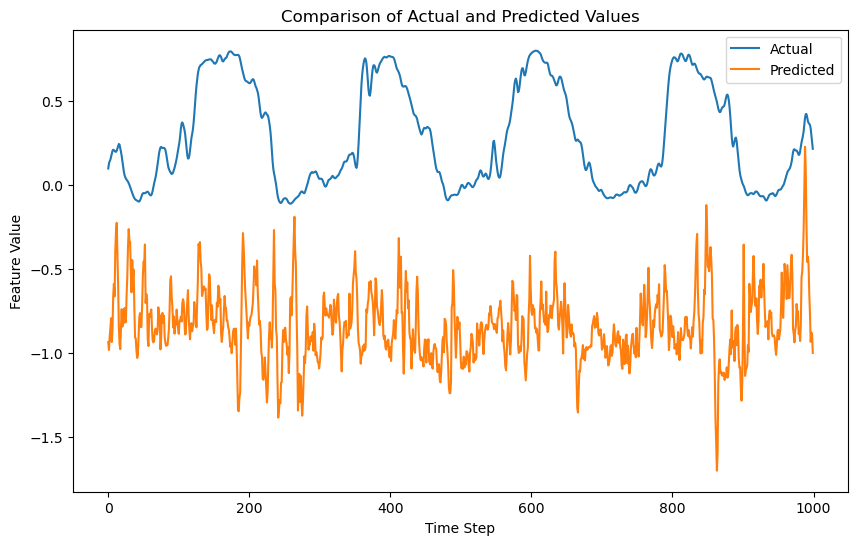

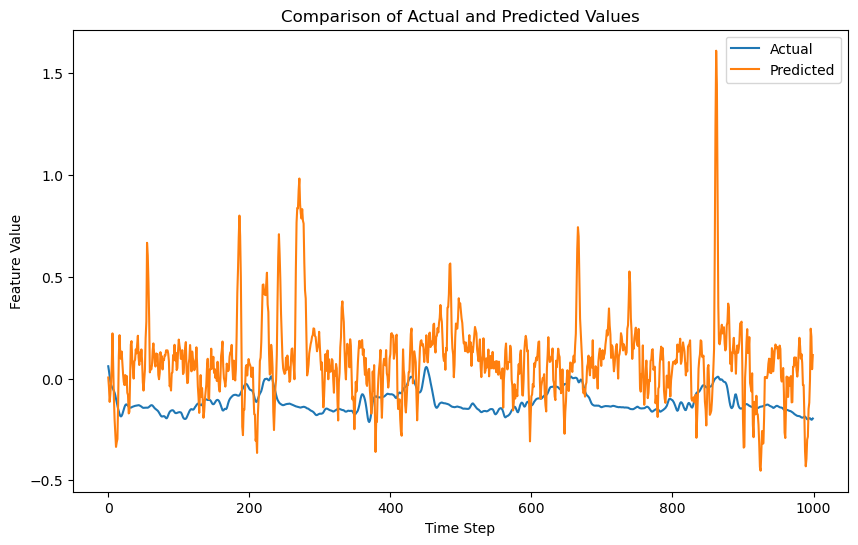

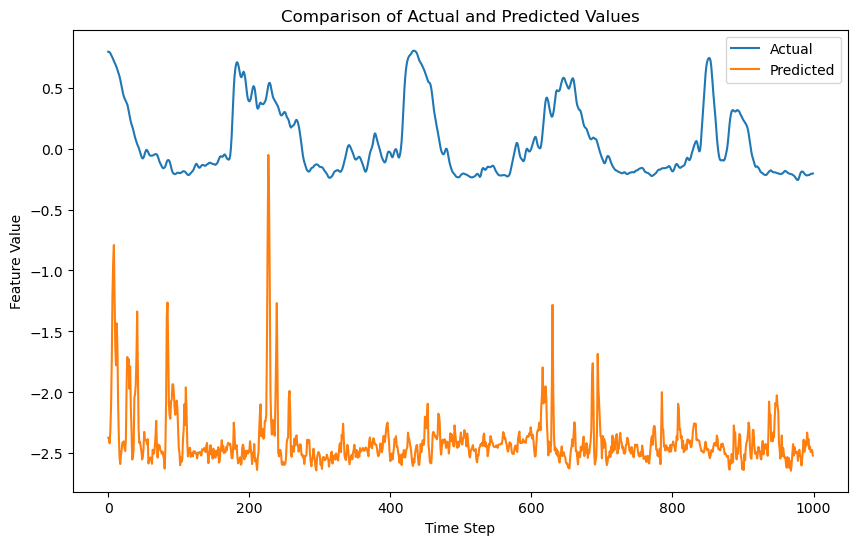

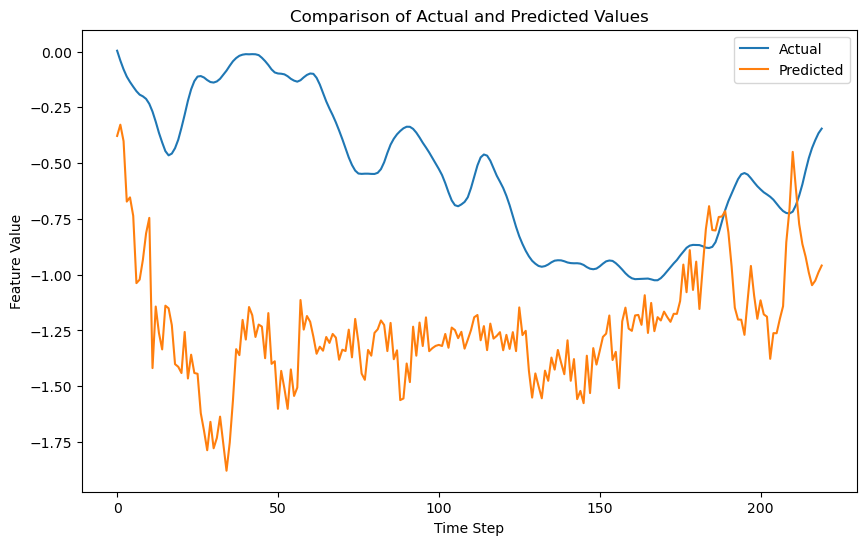

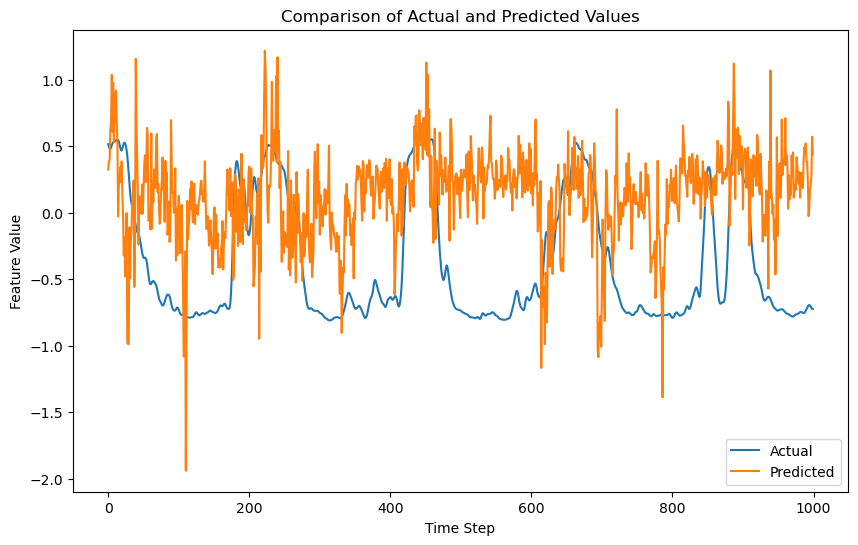

In [352]:
import matplotlib.pyplot as plt

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 0][0:1000], label='Actual')
plt.plot(test_y[:,0][0:1000], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 1][0:1000], label='Actual')
plt.plot(test_y[:,1][0:1000], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 2][1500:2500], label='Actual')
plt.plot(test_y[:,2][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 3][0:220], label='Actual')
plt.plot(test_y[:,3][0:220], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# Example: Plot the first sequence of predictions vs. actuals for the first feature
plt.figure(figsize=(10, 6))
plt.plot(rnn_predictions[0, :, 4][1500:2500], label='Actual')
plt.plot(test_y[:,4][1500:2500], label='Predicted', linestyle='-')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Feature Value')
plt.legend()
plt.show()




### 5. Decode lables from embeddings
- Decode lables (trial_ID, Success or Failure) from cebra embeddings
- Decode lables (trial_ID, Success or Failure) from RNN predicted embeddings

### 6. Pass real M1 embeddings cerebellar SNN
- See if SNN can predict when their is an error